In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for data visualization/
import seaborn as sns # for statistical data visualization
%matplotlib inline


In [2]:
df = pd.read_excel("E://DABI Projects//bank-additional-full(Dabi Project).xlsx")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,17,student,single,unknown,no,yes,no,cellular,aug,wed,...,3,4,2,success,-2.9,92.201,-31.4,0.884,5076.2,no
1,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,2,999,2,failure,-2.9,92.201,-31.4,0.869,5076.2,no
2,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,3,4,2,success,-2.9,92.201,-31.4,0.869,5076.2,no
3,17,student,single,basic.9y,no,unknown,unknown,cellular,aug,fri,...,2,999,1,failure,-2.9,92.201,-31.4,0.869,5076.2,yes
4,17,student,single,unknown,no,no,yes,cellular,oct,tue,...,1,2,2,success,-3.4,92.431,-26.9,0.742,5017.5,yes


In [4]:
df['education']=np.where(df['education'] =='basic.9y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.6y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.4y', 'Basic', df['education'])

In [5]:

df['education'].unique

<bound method Series.unique of 0        unknown
1          Basic
2          Basic
3          Basic
4        unknown
          ...   
41183    unknown
41184      Basic
41185      Basic
41186      Basic
41187      Basic
Name: education, Length: 41188, dtype: object>

# Exploratory data analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.shape

(41188, 21)

In [8]:
df[df=='unknown']=np.nan

In [9]:
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [10]:
missing_values = df.isnull().sum()/len(df)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values

marital      0.001942
job          0.008012
housing      0.024036
loan         0.024036
education    0.042027
default      0.208726
dtype: float64

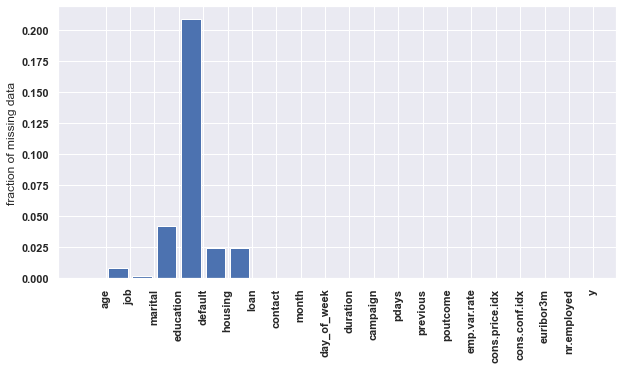

In [65]:
null_counts = df.isnull().sum()/len(df)
plt.figure(figsize=(10,5))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of missing data')
plt.bar(np.arange(len(null_counts)),null_counts)
plt.show()

In [ ]:
null_counts = df.isnull().sum()/len(df)
plt.figure(figsize=(10,5))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)
plt.show()

In [22]:
df['age'].unique()

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 91, 92, 94, 95, 98], dtype=int64)

In [34]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Outliers checking

Text(0, 0.5, 'euribor3m')

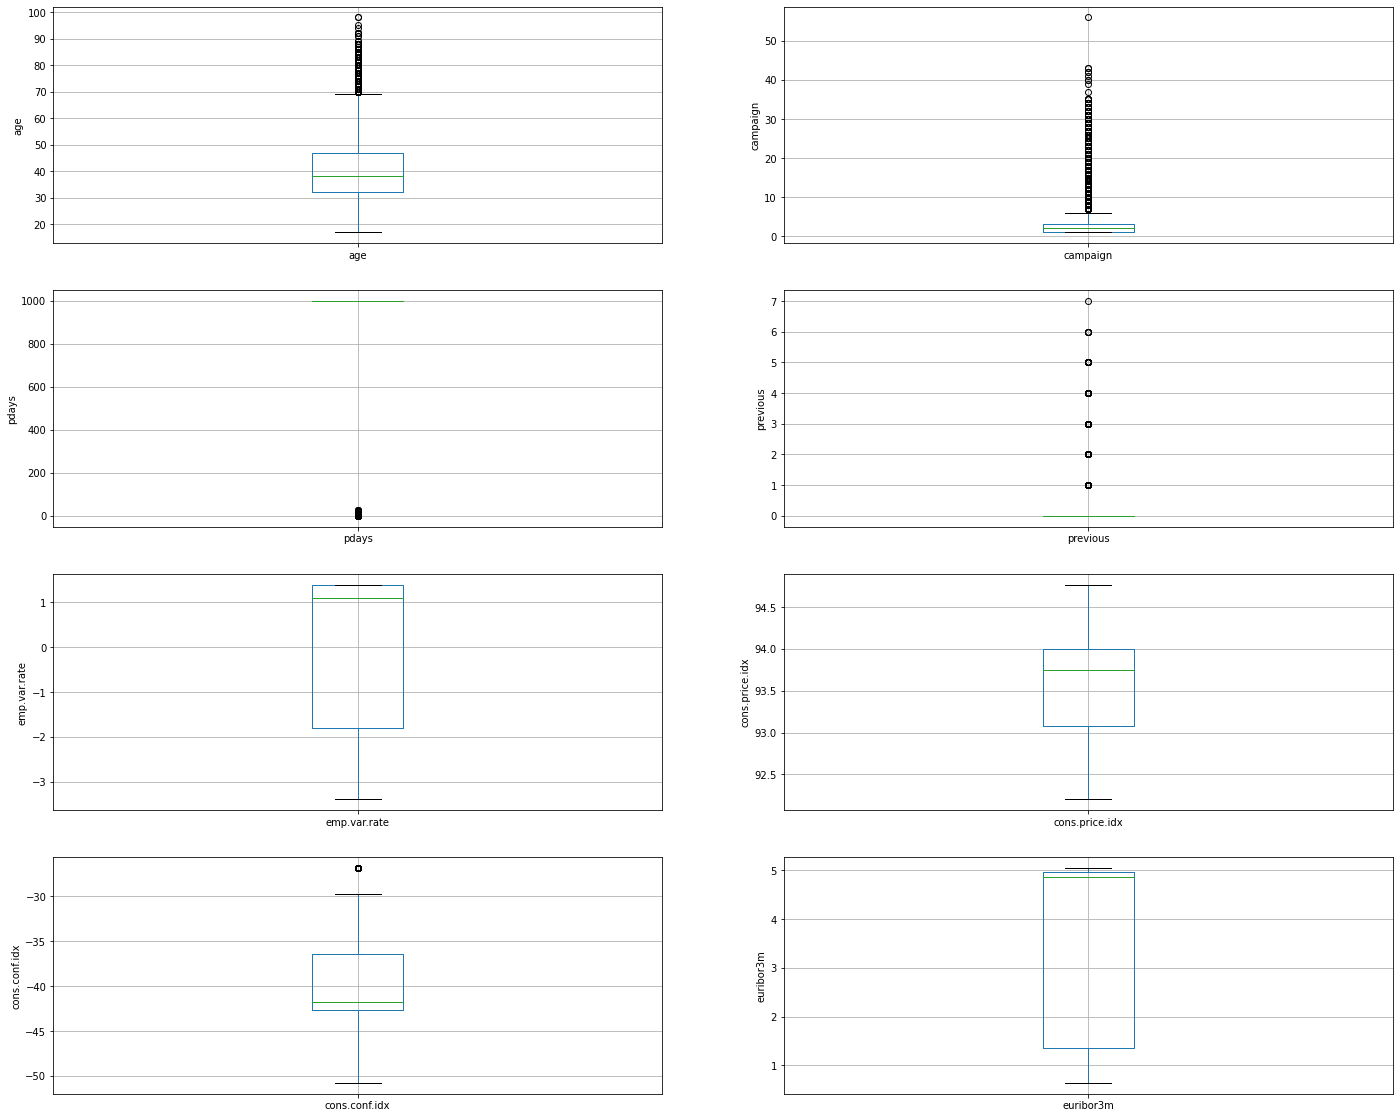

In [11]:

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='age')
fig.set_title('')
fig.set_ylabel('age')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='campaign')
fig.set_title('')
fig.set_ylabel('campaign')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='pdays')
fig.set_title('')
fig.set_ylabel('pdays')

plt.subplot(4, 2, 4)
fig = df.boxplot(column='previous')
fig.set_title('')
fig.set_ylabel('previous')

plt.subplot(4, 2, 5)
fig = df.boxplot(column='emp.var.rate')
fig.set_title('')
fig.set_ylabel('emp.var.rate')


plt.subplot(4, 2, 6)
fig = df.boxplot(column='cons.price.idx')
fig.set_title('')
fig.set_ylabel('cons.price.idx')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='cons.conf.idx')
fig.set_title('')
fig.set_ylabel('cons.conf.idx')

plt.subplot(4, 2, 8)
fig = df.boxplot(column='euribor3m')
fig.set_title('')
fig.set_ylabel('euribor3m')






Text(0, 0.5, 'nr.employed')

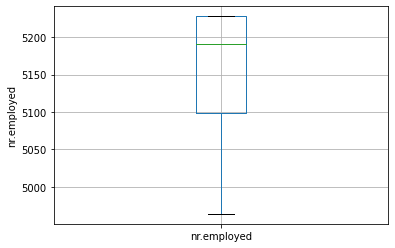

In [12]:

fig = df.boxplot(column='nr.employed')
fig.set_title('')
fig.set_ylabel('nr.employed')

from the boxplot we can clearly see that the there are outliers in "age","campaign","pdays","previous" and "cons.coef.idx" variables. 
I am going to impute the outliers through the median imputation.

# Imputation of outliers

Like imputation of missing values, we can also impute outliers. We can use mean, median, zero value in this methods. Since we imputing there is no loss of data. Here median is appropriate because it is not affected by outliers.

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


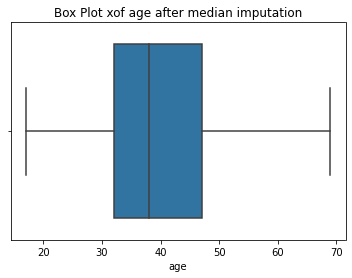

In [13]:
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
age_med = np.median(df['age'])
for i in df['age']:
    if i > Upper_tail or i < Lower_tail:
            df['age'] = df['age'].replace(i, age_med)
sns.boxplot(df['age'])
plt.title("Box Plot xof age after median imputation")
plt.show()            

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


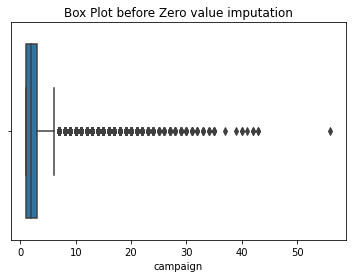

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


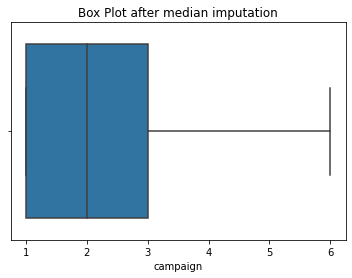

In [14]:
sns.boxplot(df['campaign'])
plt.title("Box Plot before Zero value imputation")
plt.show()


q1 = df['campaign'].quantile(0.25)
q3 = df['campaign'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
camp_med = np.median(df['campaign'])
for i in df['campaign']:
    if i > Upper_tail or i < Lower_tail:
            df['campaign'] = df['campaign'].replace(i,camp_med)
sns.boxplot(df['campaign'])
plt.title("Box Plot after median imputation")
plt.show()   


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


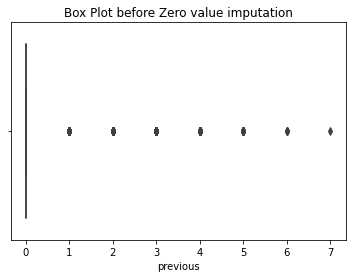

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


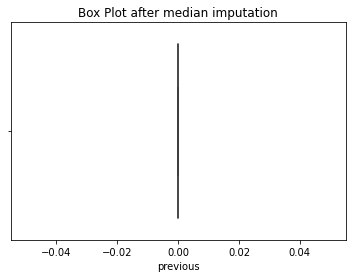

In [15]:
sns.boxplot(df['previous'])
plt.title("Box Plot before Zero value imputation")
plt.show()
q1 = df['previous'].quantile(0.25)
q3 = df['previous'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
previous_med = np.median(df['previous'])
for i in df['previous']:
    if i > Upper_tail or i < Lower_tail:
            df['previous'] = df['previous'].replace(i,previous_med)
sns.boxplot(df['previous'])
plt.title("Box Plot after median imputation")
plt.show() 




C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


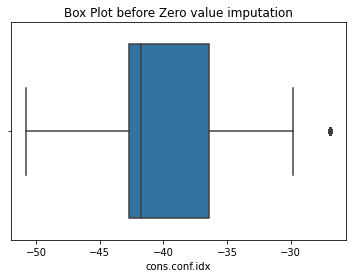

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


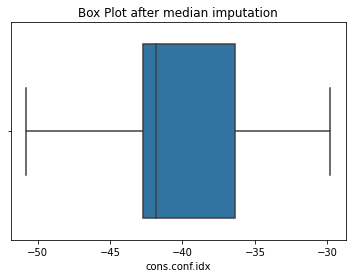

In [16]:
sns.boxplot(df['cons.conf.idx'])
plt.title("Box Plot before Zero value imputation")
plt.show()
q1 = df['cons.conf.idx'].quantile(0.25)
q3 = df['cons.conf.idx'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
cons= np.median(df['cons.conf.idx'])
for i in df['cons.conf.idx']:
    if i > Upper_tail or i < Lower_tail:
            df['cons.conf.idx'] = df['cons.conf.idx'].replace(i, cons)
sns.boxplot(df['cons.conf.idx'])
plt.title("Box Plot after median imputation")
plt.show()   

In [15]:
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [17]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

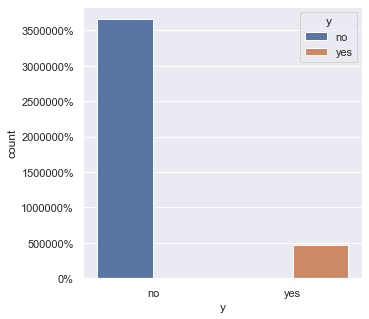

In [36]:
import matplotlib.ticker as mtick
sns.set(rc={'figure.figsize':(5,5)})

ax = sns.countplot(x="y", hue='y', data=df)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=.2, symbol='%', is_latex=False))



From the above graph we can see that there is a high imbalance between the classes. because one class "no" is higher than other calss"yes". we can balance it after encoding our data. Class Imbalance is a common problem in machine learning, especially in classification problems. Imbalance data can hamper our model accuracy big time.

In [58]:
df.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.650159,220.844807,2.062438,984.113878,0.0,0.248875,93.603757,-40.701948,3.811491,5176.166600
yes,39.034483,553.191164,1.877586,792.035560,0.0,-1.233448,93.354386,-40.367802,2.123135,5095.115991


Observations:
The average age of customers who bought the term deposit is higher than that of the customers who didn’t.
The pdays (days since the customer was last contacted) is understandably lower for the customers who subscribed the deposite. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.
Surprisingly, In "nr.employed" feature slight rise in number of employees who were interested to subscribed the deposite could be seen but the confidence of consumers (cons.conf.idx) were low in both classes.

<AxesSubplot:xlabel='age', ylabel='Count'>

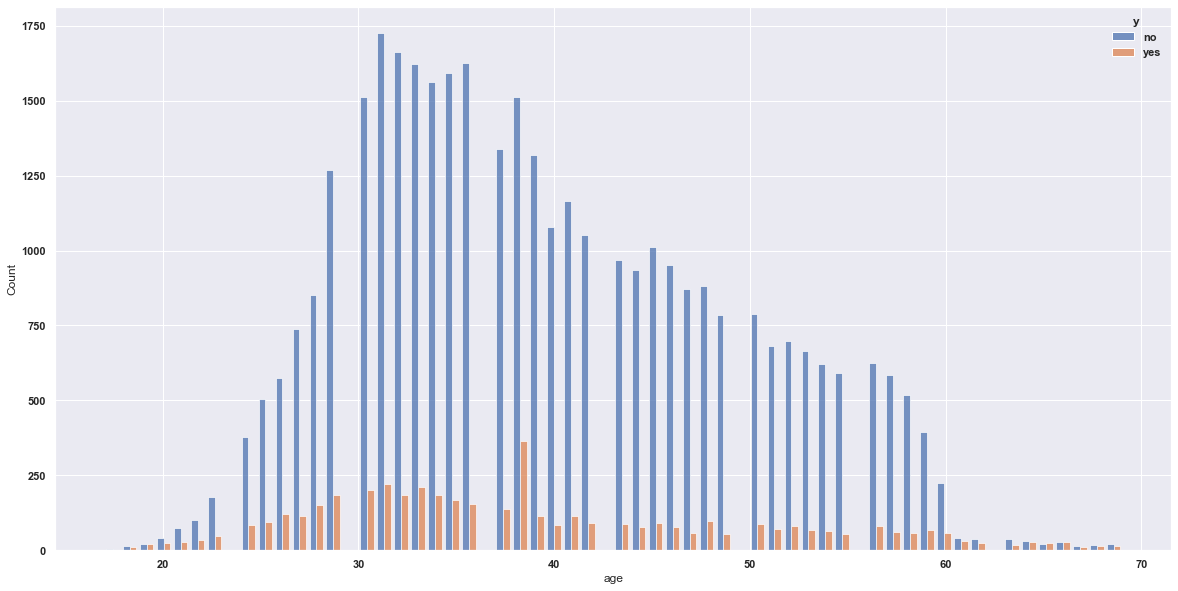

In [53]:
sns.set(rc={'figure.figsize':(20,10)})
sns.histplot(data=df, x="age", hue="y", multiple="dodge", shrink=.8)


In [57]:
df.groupby('age').mean()

,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,,,,,,,,,
17.0,420.000000,2.200000,401.600000,0.0,-3.000000,92.247000,-33.480000,0.846600,5064.460000
18.0,321.785714,1.321429,680.142857,0.0,-2.282143,93.166750,-38.485714,1.026393,5034.467857
19.0,271.500000,2.285714,809.785714,0.0,-1.869048,93.224119,-42.397619,1.242238,5063.307143
20.0,288.492308,1.938462,861.400000,0.0,-1.607692,93.257077,-39.744615,1.672508,5080.141538
21.0,264.245098,1.843137,892.117647,0.0,-1.434314,93.334422,-41.413725,1.866980,5088.063725
22.0,250.927007,1.919708,904.627737,0.0,-0.848905,93.445964,-41.540146,2.560438,5118.582482
23.0,281.274336,2.070796,906.876106,0.0,-0.665487,93.461602,-42.442920,2.636584,5128.182301
24.0,282.904968,1.995680,917.602592,0.0,-0.452700,93.527404,-41.886177,2.949629,5139.615767
25.0,259.983278,2.105351,952.535117,0.0,-0.196154,93.607527,-41.321906,3.281199,5152.151003


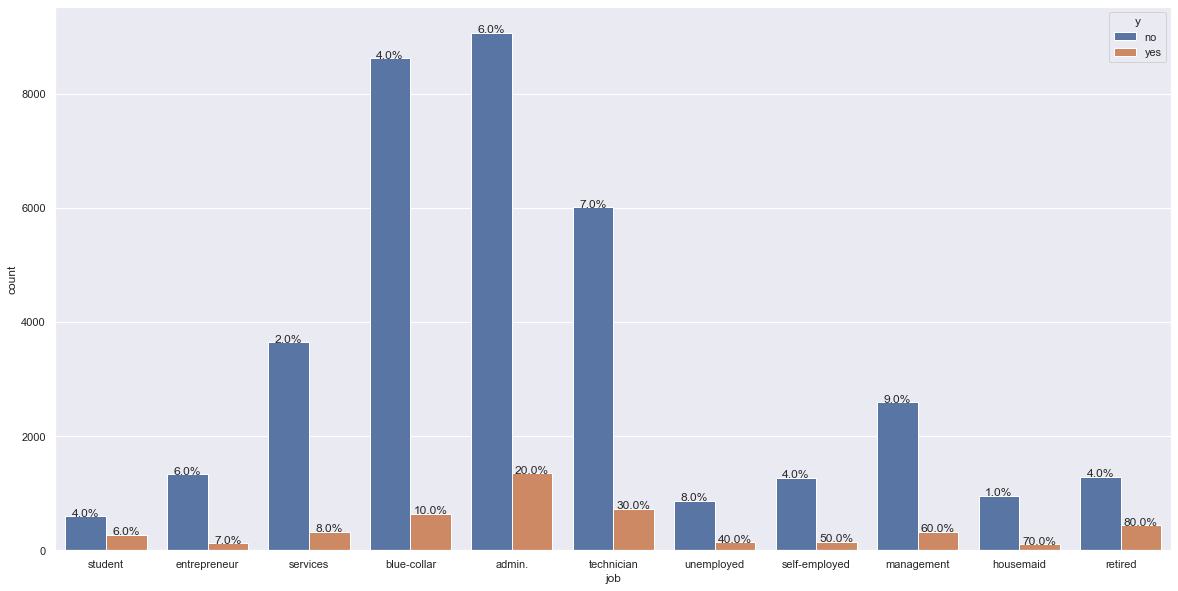

In [22]:

sns.set(rc={'figure.figsize':(20,10)})

percentage = [4, 6, 2, 4, 6, 7, 8, 4, 9, 1, 4, 6, 7, 8,10,20,30,40,50,60,70,80,90,100]
ax = sns.countplot(x="job", hue='y', data=df)
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+.05
    ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
plt.show()

<AxesSubplot:xlabel='education', ylabel='count'>

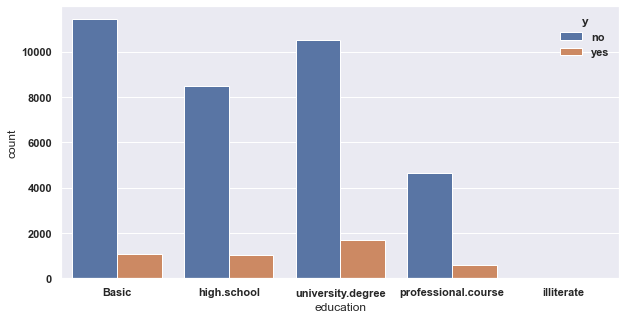

In [23]:
sns.set(rc={'figure.figsize':(10,5)})

sns.countplot(x="education", hue='y', data=df)


In [24]:
df.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
education,,,,,,,,,,
Basic,41.276433,263.043874,2.041397,974.877967,0.0,0.191329,93.639933,-41.069296,3.729654,5172.014113
high.school,37.861587,260.886810,2.052444,964.358382,0.0,0.032937,93.584857,-41.081576,3.556157,5164.994735
illiterate,46.166667,276.777778,2.000000,943.833333,0.0,-0.133333,93.317333,-39.950000,3.516556,5171.777778
professional.course,39.782949,252.533855,2.058173,960.765974,0.0,0.173012,93.569864,-40.291780,3.710457,5170.155979
university.degree,38.687295,253.223373,2.027120,951.807692,0.0,-0.028090,93.493466,-40.170505,3.529663,5163.226298


<AxesSubplot:xlabel='month', ylabel='count'>

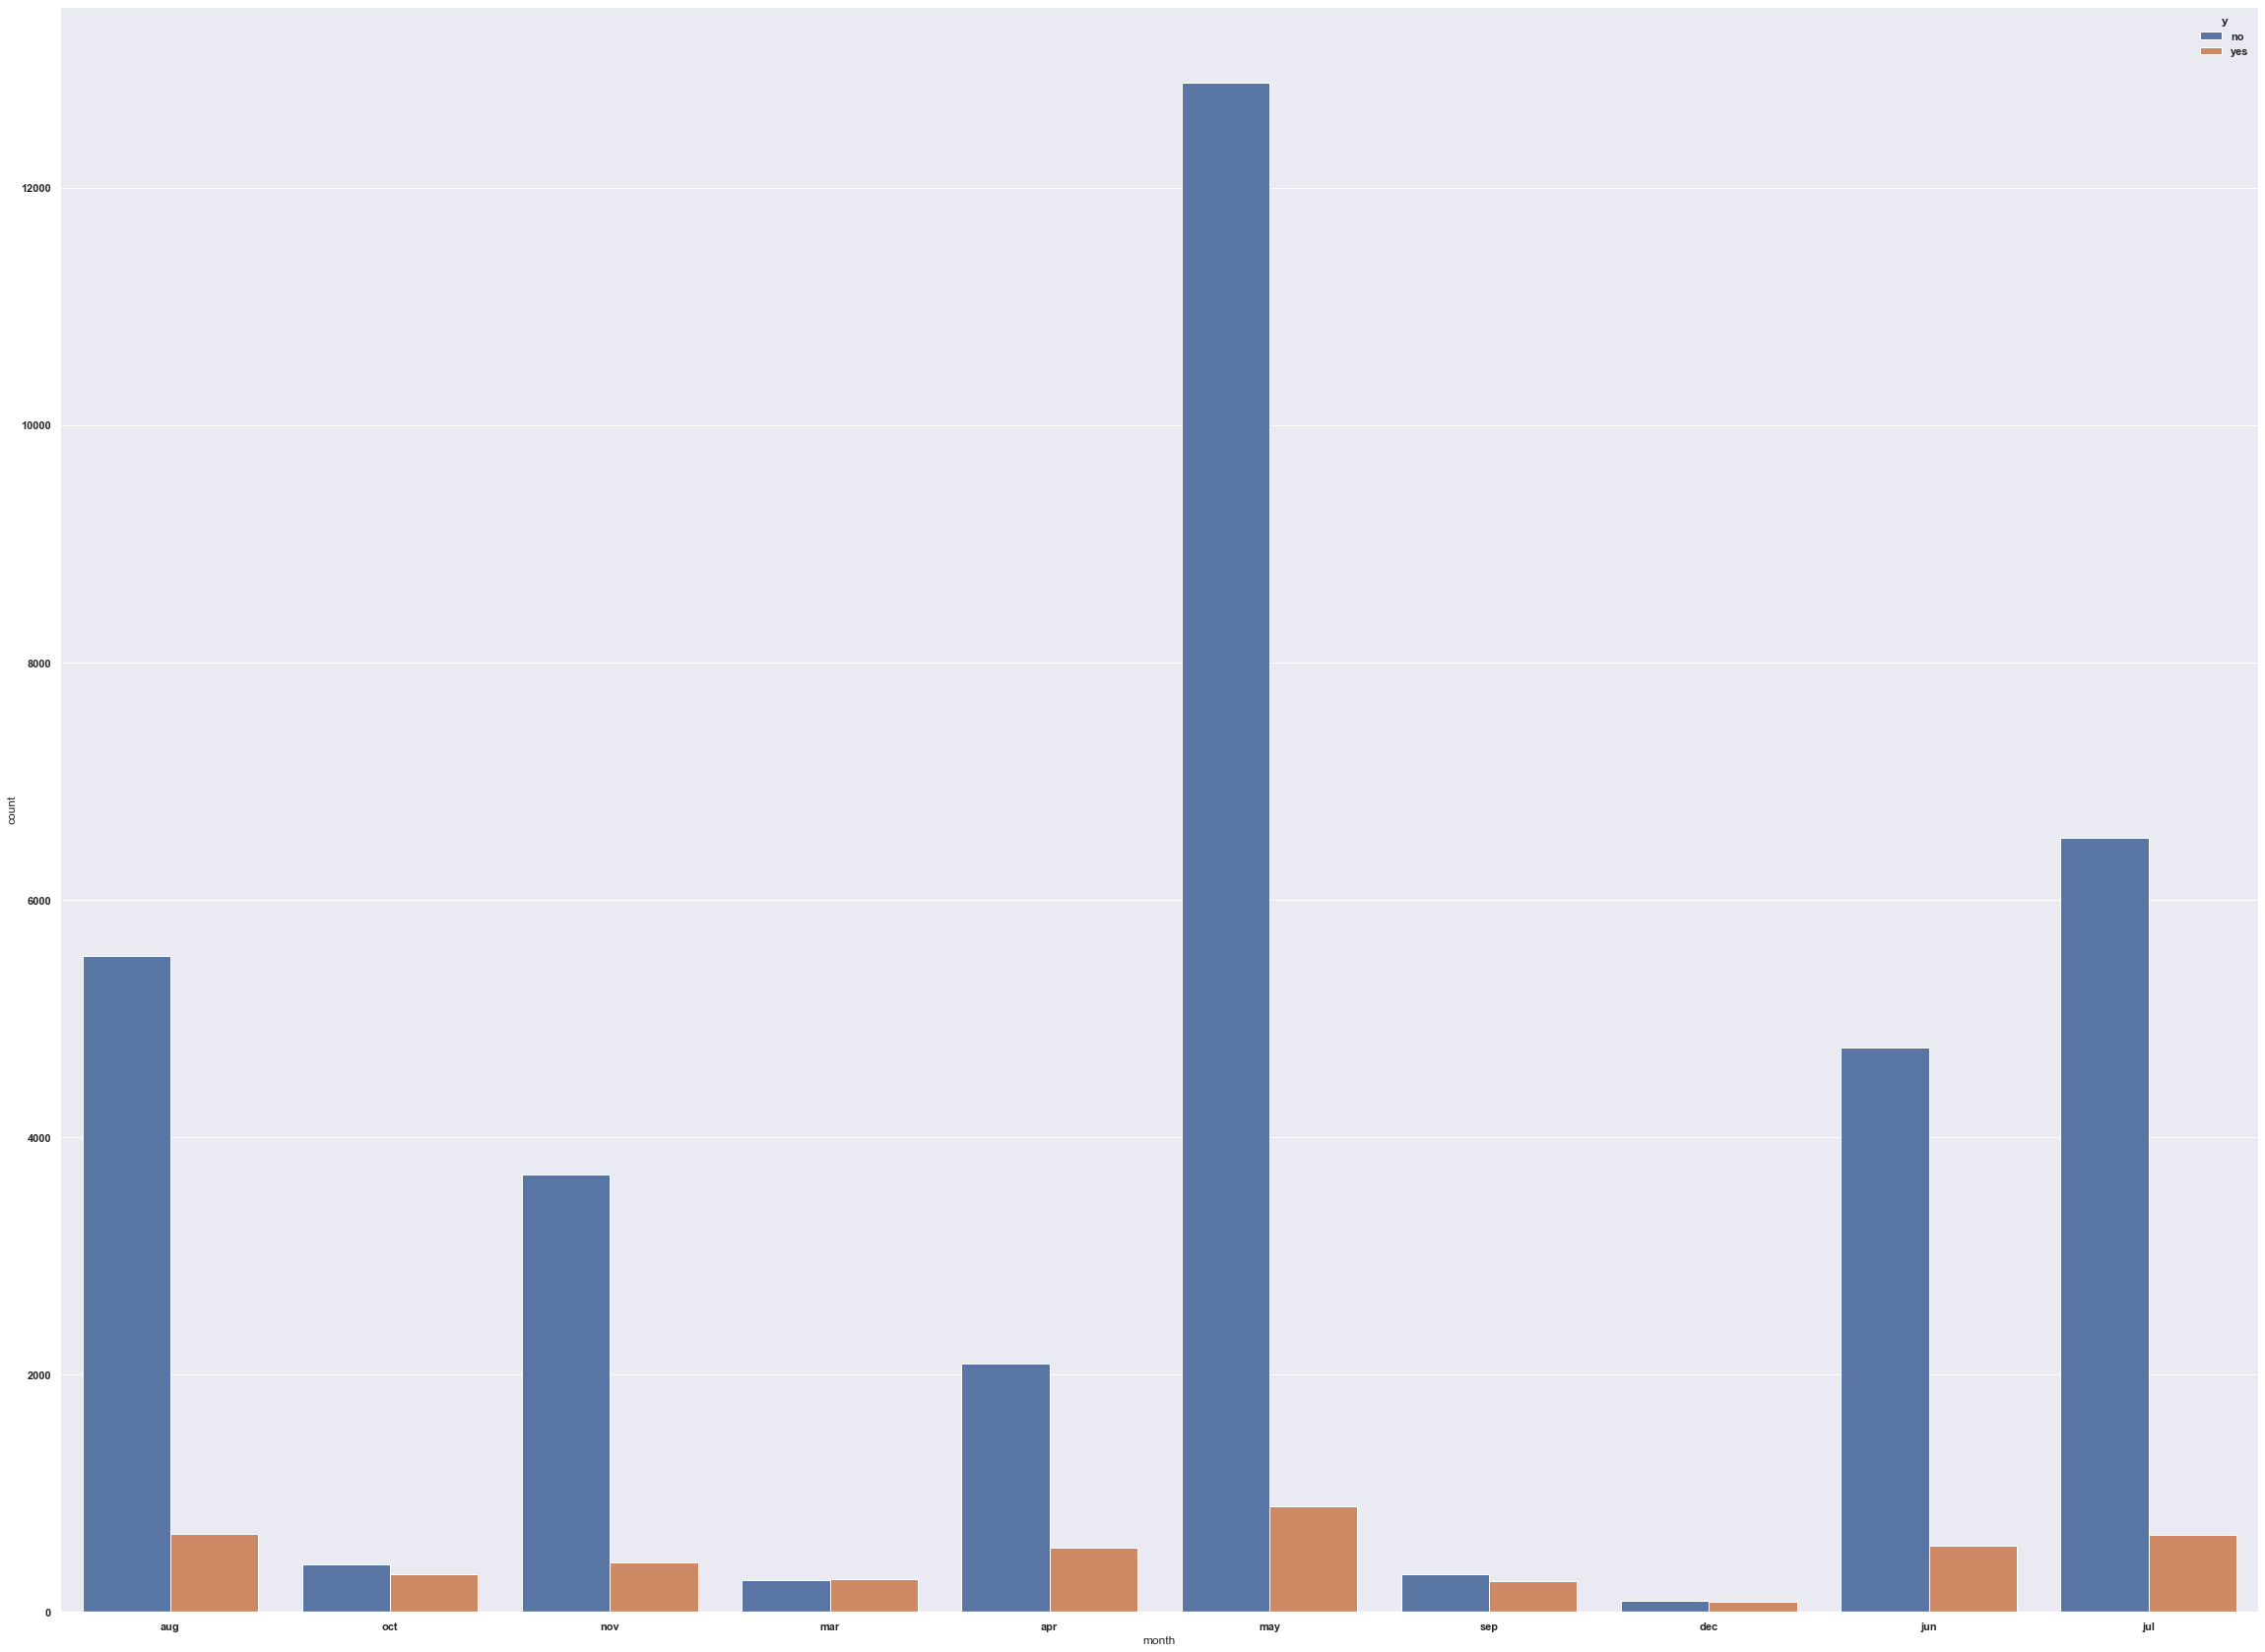

In [25]:
sns.set(rc={'figure.figsize':(40,30)})
sns.countplot(x="month", hue='y', data=df)

In [26]:
df.groupby('month').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
month,,,,,,,,,,
apr,39.572568,293.200608,1.850304,955.587386,0.0,-1.800000,93.119558,-46.273632,1.361070,5093.123708
aug,41.119456,232.430722,2.085141,961.062156,0.0,0.747151,93.311065,-35.597184,4.300623,5200.248349
dec,42.576923,345.609890,2.027473,748.060440,0.0,-2.846154,92.715363,-33.708791,0.865319,5031.895604
jul,38.860468,273.426122,2.202816,982.700725,0.0,1.158921,93.894923,-42.370170,4.685678,5214.078575
jun,39.638586,242.561301,2.123919,970.221512,0.0,0.688379,94.245402,-41.579428,4.256908,5197.493193
mar,37.485348,245.946886,1.906593,835.454212,0.0,-1.800000,93.097330,-42.650549,1.162745,5055.390110
may,38.934418,261.231752,2.059917,981.120415,0.0,-0.164972,93.528882,-40.579272,3.293665,5149.521592
nov,40.615947,245.855645,1.804926,952.950256,0.0,-0.418483,93.200943,-41.238747,3.723123,5173.031236
oct,40.373259,288.367688,1.538997,781.909471,0.0,-2.438579,93.175107,-43.857103,1.200123,5018.823816


<AxesSubplot:xlabel='day_of_week', ylabel='count'>

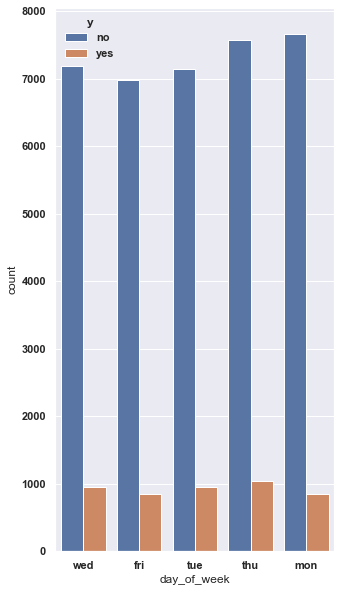

In [27]:
sns.set(rc={'figure.figsize':(5,10)})
sns.countplot(x="day_of_week", hue='y', data=df)

In [28]:
df.groupby('day_of_week').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
day_of_week,,,,,,,,,,
fri,39.749074,252.748818,2.109876,967.793791,0.0,0.032337,93.578735,-40.695975,3.566249,5165.109799
mon,40.017266,246.568358,2.174536,962.852948,0.0,0.026063,93.577108,-40.979293,3.542196,5164.568393
thu,39.145773,265.674591,1.959411,959.501913,0.0,0.058460,93.556380,-40.953763,3.574923,5166.662693
tue,39.894314,260.455995,1.989617,959.715575,0.0,0.128220,93.577088,-40.225773,3.701038,5168.486094
wed,39.111384,265.883206,1.975658,962.859970,0.0,0.166745,93.590225,-40.433428,3.726885,5170.425436


<AxesSubplot:xlabel='marital', ylabel='count'>

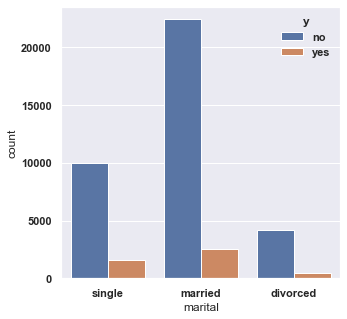

In [29]:
sns.set(rc={'figure.figsize':(5,5)})

sns.countplot(x="marital", hue='y', data=df)


<AxesSubplot:xlabel='contact', ylabel='count'>

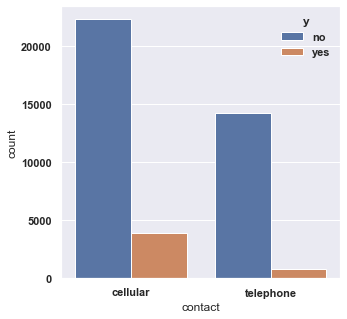

In [59]:
sns.set(rc={'figure.figsize':(5,5)})

sns.countplot(x="contact", hue='y', data=df)

In [31]:
df.groupby('contact').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
contact,,,,,,,,,,
cellular,39.340078,263.527846,2.000574,945.749235,0.0,-0.387137,93.315957,-41.608228,3.095316,5152.284260
telephone,39.999136,249.173823,2.112935,991.542874,0.0,0.896969,94.026993,-39.023923,4.535349,5192.671856


<AxesSubplot:xlabel='housing', ylabel='count'>

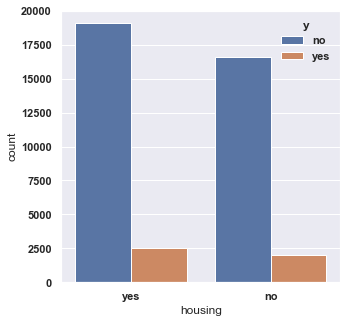

In [32]:
sns.set(rc={'figure.figsize':(5,5)})

sns.countplot(x="housing", hue='y', data=df)

In [33]:
df.groupby('housing').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
housing,,,,,,,,,,
no,39.622221,260.663677,2.052894,964.559875,0.0,0.184089,93.624836,-40.497616,3.732474,5170.661857
yes,39.544030,256.603217,2.033231,960.565304,0.0,-0.007773,93.530456,-40.817098,3.523873,5163.932949


<AxesSubplot:xlabel='loan', ylabel='count'>

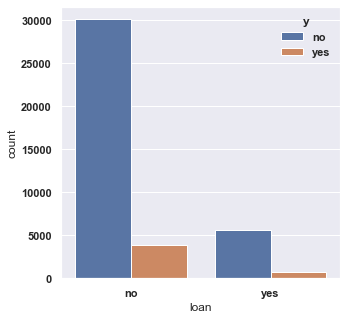

In [34]:
sns.set(rc={'figure.figsize':(5,5)})

sns.countplot(x="loan", hue='y', data=df)

In [35]:
df.groupby('loan').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
loan,,,,,,,,,,
no,39.613019,258.507246,2.034728,962.411841,0.0,0.080150,93.575402,-40.648498,3.620732,5166.920563
yes,39.402209,258.359315,2.083707,962.437420,0.0,0.086316,93.567529,-40.781018,3.619294,5167.754369


<AxesSubplot:xlabel='poutcome', ylabel='count'>

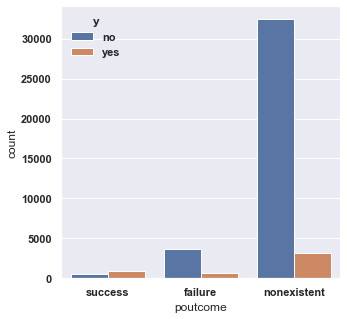

In [36]:
sns.set(rc={'figure.figsize':(5,5)})

sns.countplot(x="poutcome", hue='y', data=df)

In [37]:
df.groupby('poutcome').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
poutcome,,,,,,,,,,
failure,38.953198,248.112888,1.870884,965.976011,0.0,-1.685442,93.067755,-43.091910,1.651071,5092.589534
nonexistent,39.663920,257.082192,2.073138,999.000000,0.0,0.377091,93.645708,-40.433844,3.958189,5181.203492
success,39.371449,320.941733,1.753824,5.587764,0.0,-2.091260,93.334355,-39.115659,0.996563,5030.622433


<AxesSubplot:>

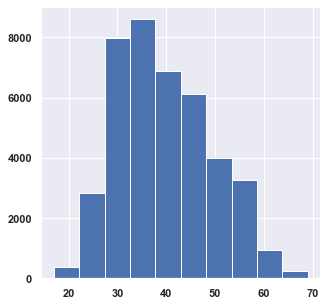

In [38]:
df.age.hist()


Observations:-
    1. The number of people were from age 30 to 50.
    
    2. From the above analysis we can observe that from "job" columns "blue-collar", "technician job" and "admin" departments people were those who were not interested as well as interested to subscribed the deposite term and "enterpertures","employed","self-employed" and "housemaid" were  those people who were least interested to subscribed the deposite.
    
    3. Majority of people who had any type of education were not interested to subscribed the deposite.
    
    4. Mostly in months "June","July","May","August" and "November" people were not interested to subscribe the deposite. But in month "March" and "september" there were almost equal number of interested and non-interested people could be seen for subscribing the deposite. but when we compare the mean value of the these two month then we can again observe that, In month September people were less contacted by the company for suscribtion therefore, they had very less confidence for subscribing the deposite.
    
    5. Most people were contact by the celluar phone as compare to telephone for subscribing the deposite.
    
    6. Most people were not interested in "housing" or any other type of "loan".
    
    7. the outcome of previous marketing campaign for subscribing the deposite were non-existing.
    
    

In [18]:
# categorising data into numerical and categorical data
df_cat = df.select_dtypes(object).astype('category') 
df_num = df.select_dtypes(np.number)

In [19]:
# numerical data
df_num = df_num.drop(['previous','emp.var.rate','cons.price.idx','cons.conf.idx','nr.employed'],axis=1)


In [20]:
df_num.describe()

,age,duration,campaign,pdays,euribor3m
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,39.580800,258.285010,2.041614,962.475454,3.621291
std,9.621224,259.279249,1.242362,186.910907,1.734447
min,17.000000,0.000000,1.000000,0.000000,0.634000
25%,32.000000,102.000000,1.000000,999.000000,1.344000
50%,38.000000,180.000000,2.000000,999.000000,4.857000
75%,47.000000,319.000000,3.000000,999.000000,4.961000
max,69.000000,4918.000000,6.000000,999.000000,5.045000


In [21]:
# Dropping the categorical values
#df_cat.drop(df_cat.columns[[2,6,7]], axis=1, inplace=True)
df_cat = df_cat.drop(['default','month','day_of_week'],axis = 1)
df_cat.head()

,job,marital,education,housing,loan,contact,poutcome,y
0,student,single,NaN,yes,no,cellular,success,no
1,student,single,Basic,yes,no,cellular,failure,no
2,student,single,Basic,yes,no,cellular,success,no
3,student,single,Basic,NaN,NaN,cellular,failure,yes
4,student,single,NaN,no,yes,cellular,success,yes


In [22]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   job        40858 non-null  category
 1   marital    41108 non-null  category
 2   education  39457 non-null  category
 3   housing    40198 non-null  category
 4   loan       40198 non-null  category
 5   contact    41188 non-null  category
 6   poutcome   41188 non-null  category
 7   y          41188 non-null  category
dtypes: category(8)
memory usage: 322.6 KB


In [23]:
cat_dummies = pd.get_dummies((df_cat.iloc[:,:-1]),drop_first = True)
cat_dummies.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,marital_single,education_high.school,education_illiterate,education_professional.course,education_university.degree,housing_yes,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success
0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,1


drop_first=True is important to use, as it helps in reducing the extra column created during dummy variable creation. Hence it reduces the correlations created among dummy variables.
Let’s say we have 3 types of values in Categorical column and we want to create dummy variable for that column. If one variable is not furnished and semi_furnished, then It is obvious unfurnished. So we do not need 3rd variable to identify the unfurnished. 
Hence if we have categorical variable with n-levels, then we need to use n-1 columns to represent the dummy variables.

In [24]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
df['y_en'] = labelencoder.fit_transform(df['y'])
y_en = pd.DataFrame(df['y_en'])
y_en


,y_en
0,0
1,0
2,0
3,1
4,1
...,...
41183,1
41184,0
41185,0
41186,1


In [184]:
#df_num = df_num.drop(['duration'],axis=1)

In [24]:
#df_num = df_num.drop(['y_en'],axis = 1)

In [25]:
df_num.isnull().sum()

age          0
duration     0
campaign     0
pdays        0
euribor3m    0
dtype: int64

In [ ]:
# correlated_features = set()
# corr = df_num.corr().abs()
# corr

In [ ]:
# import seaborn as sns
# sns.set(rc={'figure.figsize':(10,10)})
# sns.heatmap(corr, cmap = 'Wistia', annot= True)

In [ ]:
# for i in range(len(corr .columns)):
#     for j in range(i):
#         if abs(corr.iloc[i, j]) > 0.8:
#             colname = corr.columns[i]
#             correlated_features.add(colname)

In [ ]:
# len(correlated_features)

In [ ]:
# correlated_features

In [ ]:
# df_num_new = df_num.drop(correlated_features,axis = 1)
# df_num_new.head()

In [26]:
df_new = pd.concat((df_num,cat_dummies,y_en),axis=1)
# df_new = df_final.drop(['y'],axis=1)

In [27]:
df_new.head()

,age,duration,campaign,pdays,euribor3m,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,education_high.school,education_illiterate,education_professional.course,education_university.degree,housing_yes,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success,y_en
0,17.0,432,3.0,4,0.884,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,17.0,182,2.0,999,0.869,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,17.0,92,3.0,4,0.869,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,17.0,498,2.0,999,0.869,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,17.0,896,1.0,2,0.742,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1


In [28]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  float64
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  float64
 3   pdays                          41188 non-null  int64  
 4   euribor3m                      41188 non-null  float64
 5   job_blue-collar                41188 non-null  uint8  
 6   job_entrepreneur               41188 non-null  uint8  
 7   job_housemaid                  41188 non-null  uint8  
 8   job_management                 41188 non-null  uint8  
 9   job_retired                    41188 non-null  uint8  
 10  job_self-employed              41188 non-null  uint8  
 11  job_services                   41188 non-null  uint8  
 12  job_student                    41188 non-null 

In [29]:
df_new.describe()

,age,duration,campaign,pdays,euribor3m,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,education_high.school,education_illiterate,education_professional.course,education_university.degree,housing_yes,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success,y_en
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,39.580800,258.285010,2.041614,962.475454,3.621291,0.224677,0.035350,0.025736,0.070992,0.041760,...,0.231014,0.000437,0.127294,0.295426,0.523842,0.151695,0.365252,0.863431,0.033335,0.112654
std,9.621224,259.279249,1.242362,186.910907,1.734447,0.417375,0.184665,0.158348,0.256814,0.200042,...,0.421486,0.020901,0.333306,0.456239,0.499437,0.358729,0.481507,0.343396,0.179512,0.316173
min,17.000000,0.000000,1.000000,0.000000,0.634000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,102.000000,1.000000,999.000000,1.344000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,4.857000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,4.961000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,69.000000,4918.000000,6.000000,999.000000,5.045000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
from sklearn import preprocessing 
norm = preprocessing.normalize(df_new.iloc[:,:-1])
#df_nnew = pd.DataFrame(scaler.fit_transform(df_new.iloc[:,:-1]), columns = df_new.iloc[:,:-1].columns)
# df_nnew.head()
df_nnew = pd.DataFrame((df_new.iloc[:,:-1]), columns = df_new.iloc[:,:-1].columns)
df_nnew.head()

,age,duration,campaign,pdays,euribor3m,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,marital_single,education_high.school,education_illiterate,education_professional.course,education_university.degree,housing_yes,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success
0,17.0,432,3.0,4,0.884,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
1,17.0,182,2.0,999,0.869,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,17.0,92,3.0,4,0.869,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
3,17.0,498,2.0,999,0.869,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,17.0,896,1.0,2,0.742,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [31]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 5)
df1= pd.DataFrame(imputer.fit_transform(df_nnew),columns = df_nnew.columns)



In [32]:
df1.head(3)

,age,duration,campaign,pdays,euribor3m,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,marital_single,education_high.school,education_illiterate,education_professional.course,education_university.degree,housing_yes,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success
0,17.0,432.0,3.0,4.0,0.884,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,17.0,182.0,2.0,999.0,0.869,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,17.0,92.0,3.0,4.0,0.869,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [33]:
df1.columns

Index(['age', 'duration', 'campaign', 'pdays', 'euribor3m', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_married', 'marital_single',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'housing_yes', 'loan_yes', 'contact_telephone', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

In [34]:
correlated_features1 = set()
corr1 = df1.corr()

<AxesSubplot:>

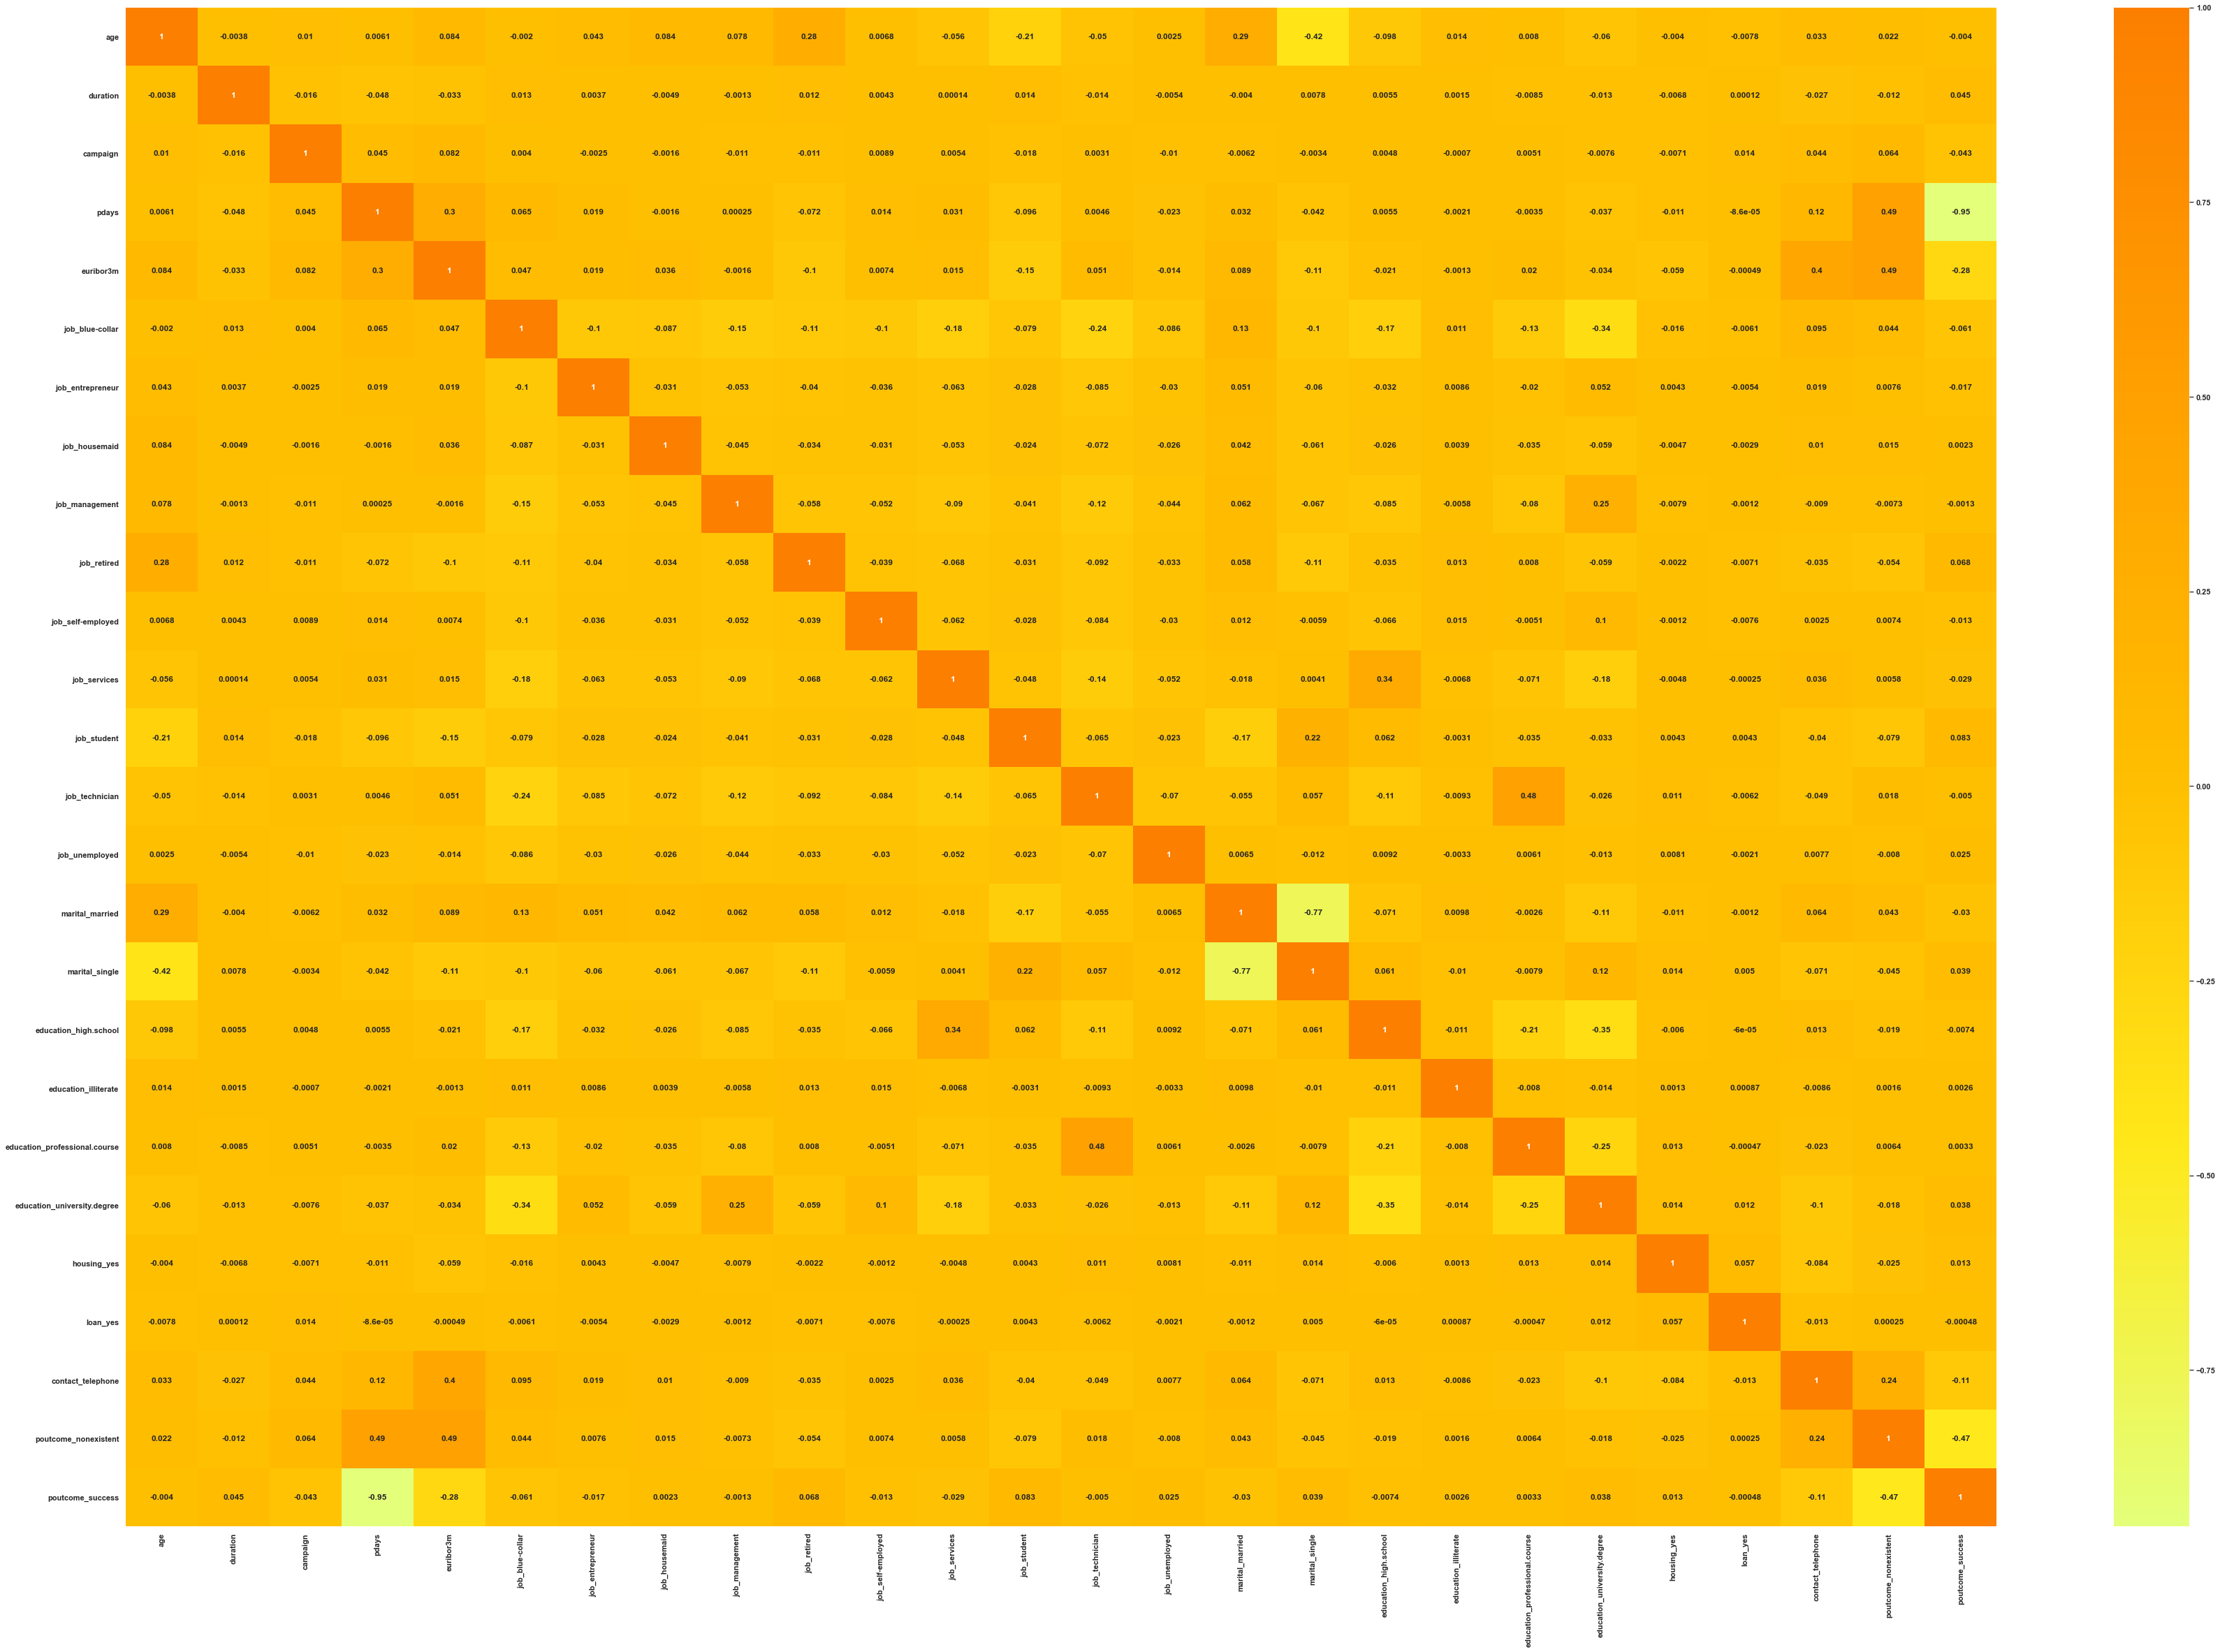

In [56]:
import seaborn as sns
sns.set(rc={'figure.figsize':(60,40)})
sns.heatmap(corr1, cmap = 'Wistia', annot= True)

In [35]:
for i in range(len(corr1 .columns)):
    for j in range(i):
        if abs(corr1.iloc[i, j]) >0.5:
            colname = corr1.columns[i]
            correlated_features1.add(colname)

In [36]:
len(correlated_features1)

2

In [37]:
correlated_features1

{'marital_single', 'poutcome_success'}

In [38]:
final_data = df1.drop(correlated_features1,axis = 1)
final_data 

,age,duration,campaign,pdays,euribor3m,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,job_unemployed,marital_married,education_high.school,education_illiterate,education_professional.course,education_university.degree,housing_yes,loan_yes,contact_telephone,poutcome_nonexistent
0,17.0,432.0,3.0,4.0,0.884,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,17.0,182.0,2.0,999.0,0.869,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,17.0,92.0,3.0,4.0,0.869,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,17.0,498.0,2.0,999.0,0.869,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17.0,896.0,1.0,2.0,0.742,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,38.0,370.0,1.0,3.0,0.903,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41184,38.0,134.0,1.0,999.0,0.716,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41185,38.0,85.0,1.0,999.0,1.650,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41186,38.0,476.0,1.0,2.0,0.730,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [39]:
final_data = pd.concat((final_data,y_en),axis = 1)

In [40]:
final_data.reset_index(drop = True)

,age,duration,campaign,pdays,euribor3m,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,marital_married,education_high.school,education_illiterate,education_professional.course,education_university.degree,housing_yes,loan_yes,contact_telephone,poutcome_nonexistent,y_en
0,17.0,432.0,3.0,4.0,0.884,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,17.0,182.0,2.0,999.0,0.869,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,17.0,92.0,3.0,4.0,0.869,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,17.0,498.0,2.0,999.0,0.869,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,17.0,896.0,1.0,2.0,0.742,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,38.0,370.0,1.0,3.0,0.903,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
41184,38.0,134.0,1.0,999.0,0.716,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
41185,38.0,85.0,1.0,999.0,1.650,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
41186,38.0,476.0,1.0,2.0,0.730,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


In [41]:
final_data.columns


Index(['age', 'duration', 'campaign', 'pdays', 'euribor3m', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_married', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'housing_yes', 'loan_yes',
       'contact_telephone', 'poutcome_nonexistent', 'y_en'],
      dtype='object')

In [42]:
X_col = final_data.iloc[:,:-1].values
y_col = final_data['y_en']  # target variable

In [43]:
y_col

0        0
1        0
2        0
3        1
4        1
        ..
41183    1
41184    0
41185    0
41186    1
41187    1
Name: y_en, Length: 41188, dtype: int32

In [42]:
# final_data['y_en'].value_counts()

In [44]:
#splitting the data into train and test data
from sklearn.model_selection import train_test_split
# split into inputs and outputs
X = final_data.drop('y_en',axis = 1)
y= final_data['y_en']


Now after preparing our data i am going to balance the classes so that our model can predict perfect result.

# Synthetic Minority Oversampling Technique (SMOTE)

This technique generates synthetic data for the minority class.

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

SMOTE algorithm works in 4 simple steps:

Choose a minority class as the input vector
Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
Repeat the steps until data is balanced


In [ ]:
# print(X.shape, y.shape)
# # split into train test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.03, random_state=1)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [45]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split



In [46]:
sm = SMOTE(sampling_strategy = 'minority')
X_sm, y_sm = sm.fit_resample(X, y)
# X_train_res = pd.DataFrame(data = X_train_res,columns=df_new.columns)
# y_train_res = pd.DataFrame(data = y_train_res,columns = df_new['y_en'])


In [47]:
y_sm.value_counts()

0    36548
1    36548
Name: y_en, dtype: int64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=15,stratify = y_sm)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (51167, 24)
Number transactions y_train dataset:  (51167,)
Number transactions X_test dataset:  (21929, 24)
Number transactions y_test dataset:  (21929,)


In [49]:
y_train.value_counts()

1    25584
0    25583
Name: y_en, dtype: int64

In [50]:
y_test.value_counts()

0    10965
1    10964
Name: y_en, dtype: int64

In [51]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

print('After OverSampling, the shape of train_X: {}'.format(X_sm.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_sm.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_sm==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_sm==0)))

Before OverSampling, counts of label '1': 25584
Before OverSampling, counts of label '0': 25583 

After OverSampling, the shape of train_X: (73096, 24)
After OverSampling, the shape of train_y: (73096,) 

After OverSampling, counts of label '1': 36548
After OverSampling, counts of label '0': 36548


Now we have a perfect balanced data! You may have noticed that I over-sampled only on the training data, because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.

# Recursive Feature Elimination (RFE) for feature selection

# From sklearn Documentation:
<!-- The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.we could use any estimator with the method. In this case, I am using  LogisticRegression , and the RFE observes the coef_ attribute of the LogisticRegression object -->


In [52]:
#ignore warning messages 
import warnings
warnings.filterwarnings('ignore')


from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'lbfgs',multi_class = 'auto')
rfe = RFE(logreg, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train.ravel())
print(rfe.support_)
print(rfe.ranking_)


[False False False False  True  True  True  True  True  True  True  True
  True False  True False False  True False  True  True False  True  True]
[ 9  6  2 10  1  1  1  1  1  1  1  1  1  7  1  5  8  1  3  1  1  4  1  1]


In [53]:
X_train.columns[rfe.support_]

Index(['euribor3m', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_unemployed', 'education_illiterate',
       'education_university.degree', 'housing_yes', 'contact_telephone',
       'poutcome_nonexistent'],
      dtype='object')

In [54]:
import statsmodels.api as sm
cols = [ 'euribor3m', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'education_illiterate',
       'education_university.degree', 'housing_yes', 'contact_telephone',
       'poutcome_nonexistent']
X = X_sm[cols]
y = np.array(y_sm)
X = sm.add_constant(X)

In [55]:
len(X)
X.shape

(73096, 16)

In [56]:
len(y)
y.shape

(73096,)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error

# fit the model
model = LogisticRegression(solver = 'lbfgs',multi_class = 'auto',class_weight = None)
model.fit(X_train, y_train)
# evaluate the model
# yhat = model.predict(X_test)
# # evaluate predictions
# mae = mean_absolute_error(y_test, yhat)
# print('MAE: %.3f' % mae)

LogisticRegression()

In [58]:
import statsmodels.api as sm

# fit the model with maximum likelihood function
model = sm.Logit(endog=y, exog=X).fit()
model

Optimization terminated successfully.
         Current function value: 0.573755
         Iterations 5


In [59]:
print(model.summary2())

                               Results: Logit
Model:                   Logit               Pseudo R-squared:    0.172     
Dependent Variable:      y                   AIC:                 83910.4368
Date:                    2021-10-02 12:44    BIC:                 84057.6293
No. Observations:        73096               Log-Likelihood:      -41939.   
Df Model:                15                  LL-Null:             -50666.   
Df Residuals:            73080               LLR p-value:         0.0000    
Converged:               1.0000              Scale:               1.0000    
No. Iterations:          5.0000                                             
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
const                        1.6619   0.0292  56.8968 0.0000  1.6046  1.7191
euribor3m                   -0

Removing the variable which are greter p> 0.05.(education_illiterate,job_housemaid,job_management)

In [60]:
 cols_1 = ['euribor3m', 'job_blue-collar', 'job_entrepreneur', 
       'job_management', 'job_retired', 'job_services',
       'job_student', 
       'education_university.degree', 'housing_yes', 'contact_telephone',
       'poutcome_nonexistent']
y_1 = np.array(y_sm)
X_1 =X_sm[cols_1]

In [61]:
# fit the model
model_1 = LogisticRegression(solver = 'lbfgs',multi_class = 'auto',class_weight = None)
model_1.fit(X_1, y_1)

LogisticRegression()

In [62]:
import statsmodels.api as sm

# fit the model with maximum likelihood function
model_1 = sm.Logit(endog=y_1, exog=X_1).fit()
model_1

Optimization terminated successfully.
         Current function value: 0.601716
         Iterations 5


In [63]:
print(model_1.summary2())

                               Results: Logit
Model:                   Logit               Pseudo R-squared:    0.132     
Dependent Variable:      y                   AIC:                 87988.0896
Date:                    2021-10-02 12:44    BIC:                 88089.2844
No. Observations:        73096               Log-Likelihood:      -43983.   
Df Model:                10                  LL-Null:             -50666.   
Df Residuals:            73085               LLR p-value:         0.0000    
Converged:               1.0000              Scale:               1.0000    
No. Iterations:          5.0000                                             
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
euribor3m                   -0.3709   0.0055 -67.2806 0.0000 -0.3817 -0.3601
job_blue-collar              0

In [64]:
cols_1 = ['euribor3m', 'job_blue-collar', 
        'job_retired', 'job_services',
       'job_student', 
       'education_university.degree', 'housing_yes', 'contact_telephone',
       'poutcome_nonexistent'
     ]
y = np.array(y_sm)
X=X_sm[cols_1]

In [65]:
#fit the model
model_2 = LogisticRegression(solver = 'lbfgs',multi_class = 'auto',class_weight = None)
model_2.fit(X_train, y_train)

LogisticRegression()

In [66]:
import statsmodels.api as sm

# fit the model with maximum likelihood function
model_2= sm.Logit(endog=y, exog=X).fit()
model_2

Optimization terminated successfully.
         Current function value: 0.601769
         Iterations 5


In [67]:
print(model_2.summary2())


                               Results: Logit
Model:                   Logit               Pseudo R-squared:    0.132     
Dependent Variable:      y                   AIC:                 87991.8653
Date:                    2021-10-02 12:45    BIC:                 88074.6610
No. Observations:        73096               Log-Likelihood:      -43987.   
Df Model:                8                   LL-Null:             -50666.   
Df Residuals:            73087               LLR p-value:         0.0000    
Converged:               1.0000              Scale:               1.0000    
No. Iterations:          5.0000                                             
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
euribor3m                   -0.3701   0.0055 -67.2325 0.0000 -0.3809 -0.3593
job_blue-collar              0

In [ ]:
# cols_1 = ['emp.var.rate', 'job_blue-collar', 'job_retired', 'job_student',
#        'education_university.degree',
#        'contact_telephone',  'month_dec', 'month_jul', 
#        'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
#        'day_of_week_mon', 'day_of_week_wed']
# y = np.array(y_sm)
# X=X_sm[cols_1]

In [ ]:
# # fit the model
# model_2 = LogisticRegression()
# model_2.fit(X, y)

In [ ]:
# import statsmodels.api as sm

# # fit the model with maximum likelihood function
# model_2= sm.Logit(endog=y, exog=X).fit()
# model_2

In [ ]:
# print(model_2.summary())


In [71]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [93]:
# K fold Cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# 5 folds selected
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
model_1 = LogisticRegression(solver='lbfgs',class_weight = None,dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1)
results = cross_val_score(model_1, X_train, y_train, cv=kfold)
# Output the accuracy. Calculate the mean and std across all folds. 
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 85.956% (0.240%)


In [98]:

from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver = 'lbfgs',multi_class = 'auto',class_weight = None)
logreg.fit(X_train, y_train)

LogisticRegression()

In [51]:
# from matplotlib import pyplot
# # get importance
# importance = logreg.coef_[0]
# # summarize feature importance
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()

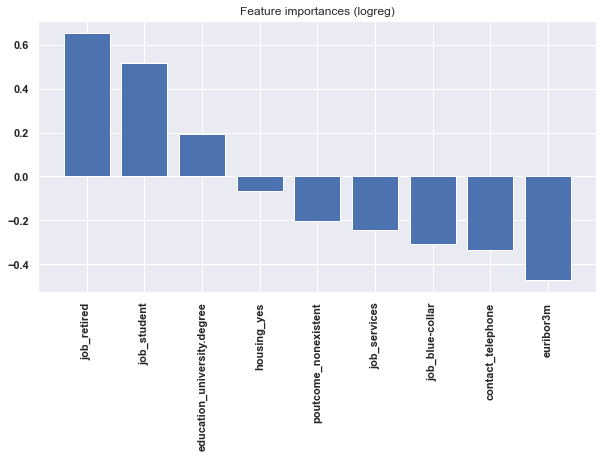

In [101]:
plt.figure(figsize=(10,5))
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, logreg.coef_[0]), key=lambda x: x[1] * -1)
logreg_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances
x_pos = np.arange(0, len(logreg_feature_importances))
plt.bar(x_pos, logreg_feature_importances['score'])
plt.xticks(x_pos, logreg_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (logreg)')

plt.show()

In [102]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.71


In [103]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7822 3087]
 [3185 7835]]


In [104]:
#transform confusion matrix into array
#the matrix is stored in a vaiable called confmtrx
confmtrx = np.array(confusion_matrix)
#Create DataFrame from confmtrx array 
#rows for test: subscribe, No_subscribe designation as index 
#columns for preds: Pred_subscribe, Pred_Nosubscribe as column
pd.DataFrame(confmtrx, index=['No_Subscribe','Subscribe'],
columns=['Predicted_No_Subscribe', 'Predicted_Subscribe', ])

,Predicted_No_Subscribe,Predicted_Subscribe
No_Subscribe,7822,3087
Subscribe,3185,7835


In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71     10909
           1       0.72      0.71      0.71     11020

    accuracy                           0.71     21929
   macro avg       0.71      0.71      0.71     21929
weighted avg       0.71      0.71      0.71     21929



In [106]:
from sklearn.metrics import accuracy_score
# Accuracy score
accuracy_score(y_test, y_pred)

0.7139860458753249

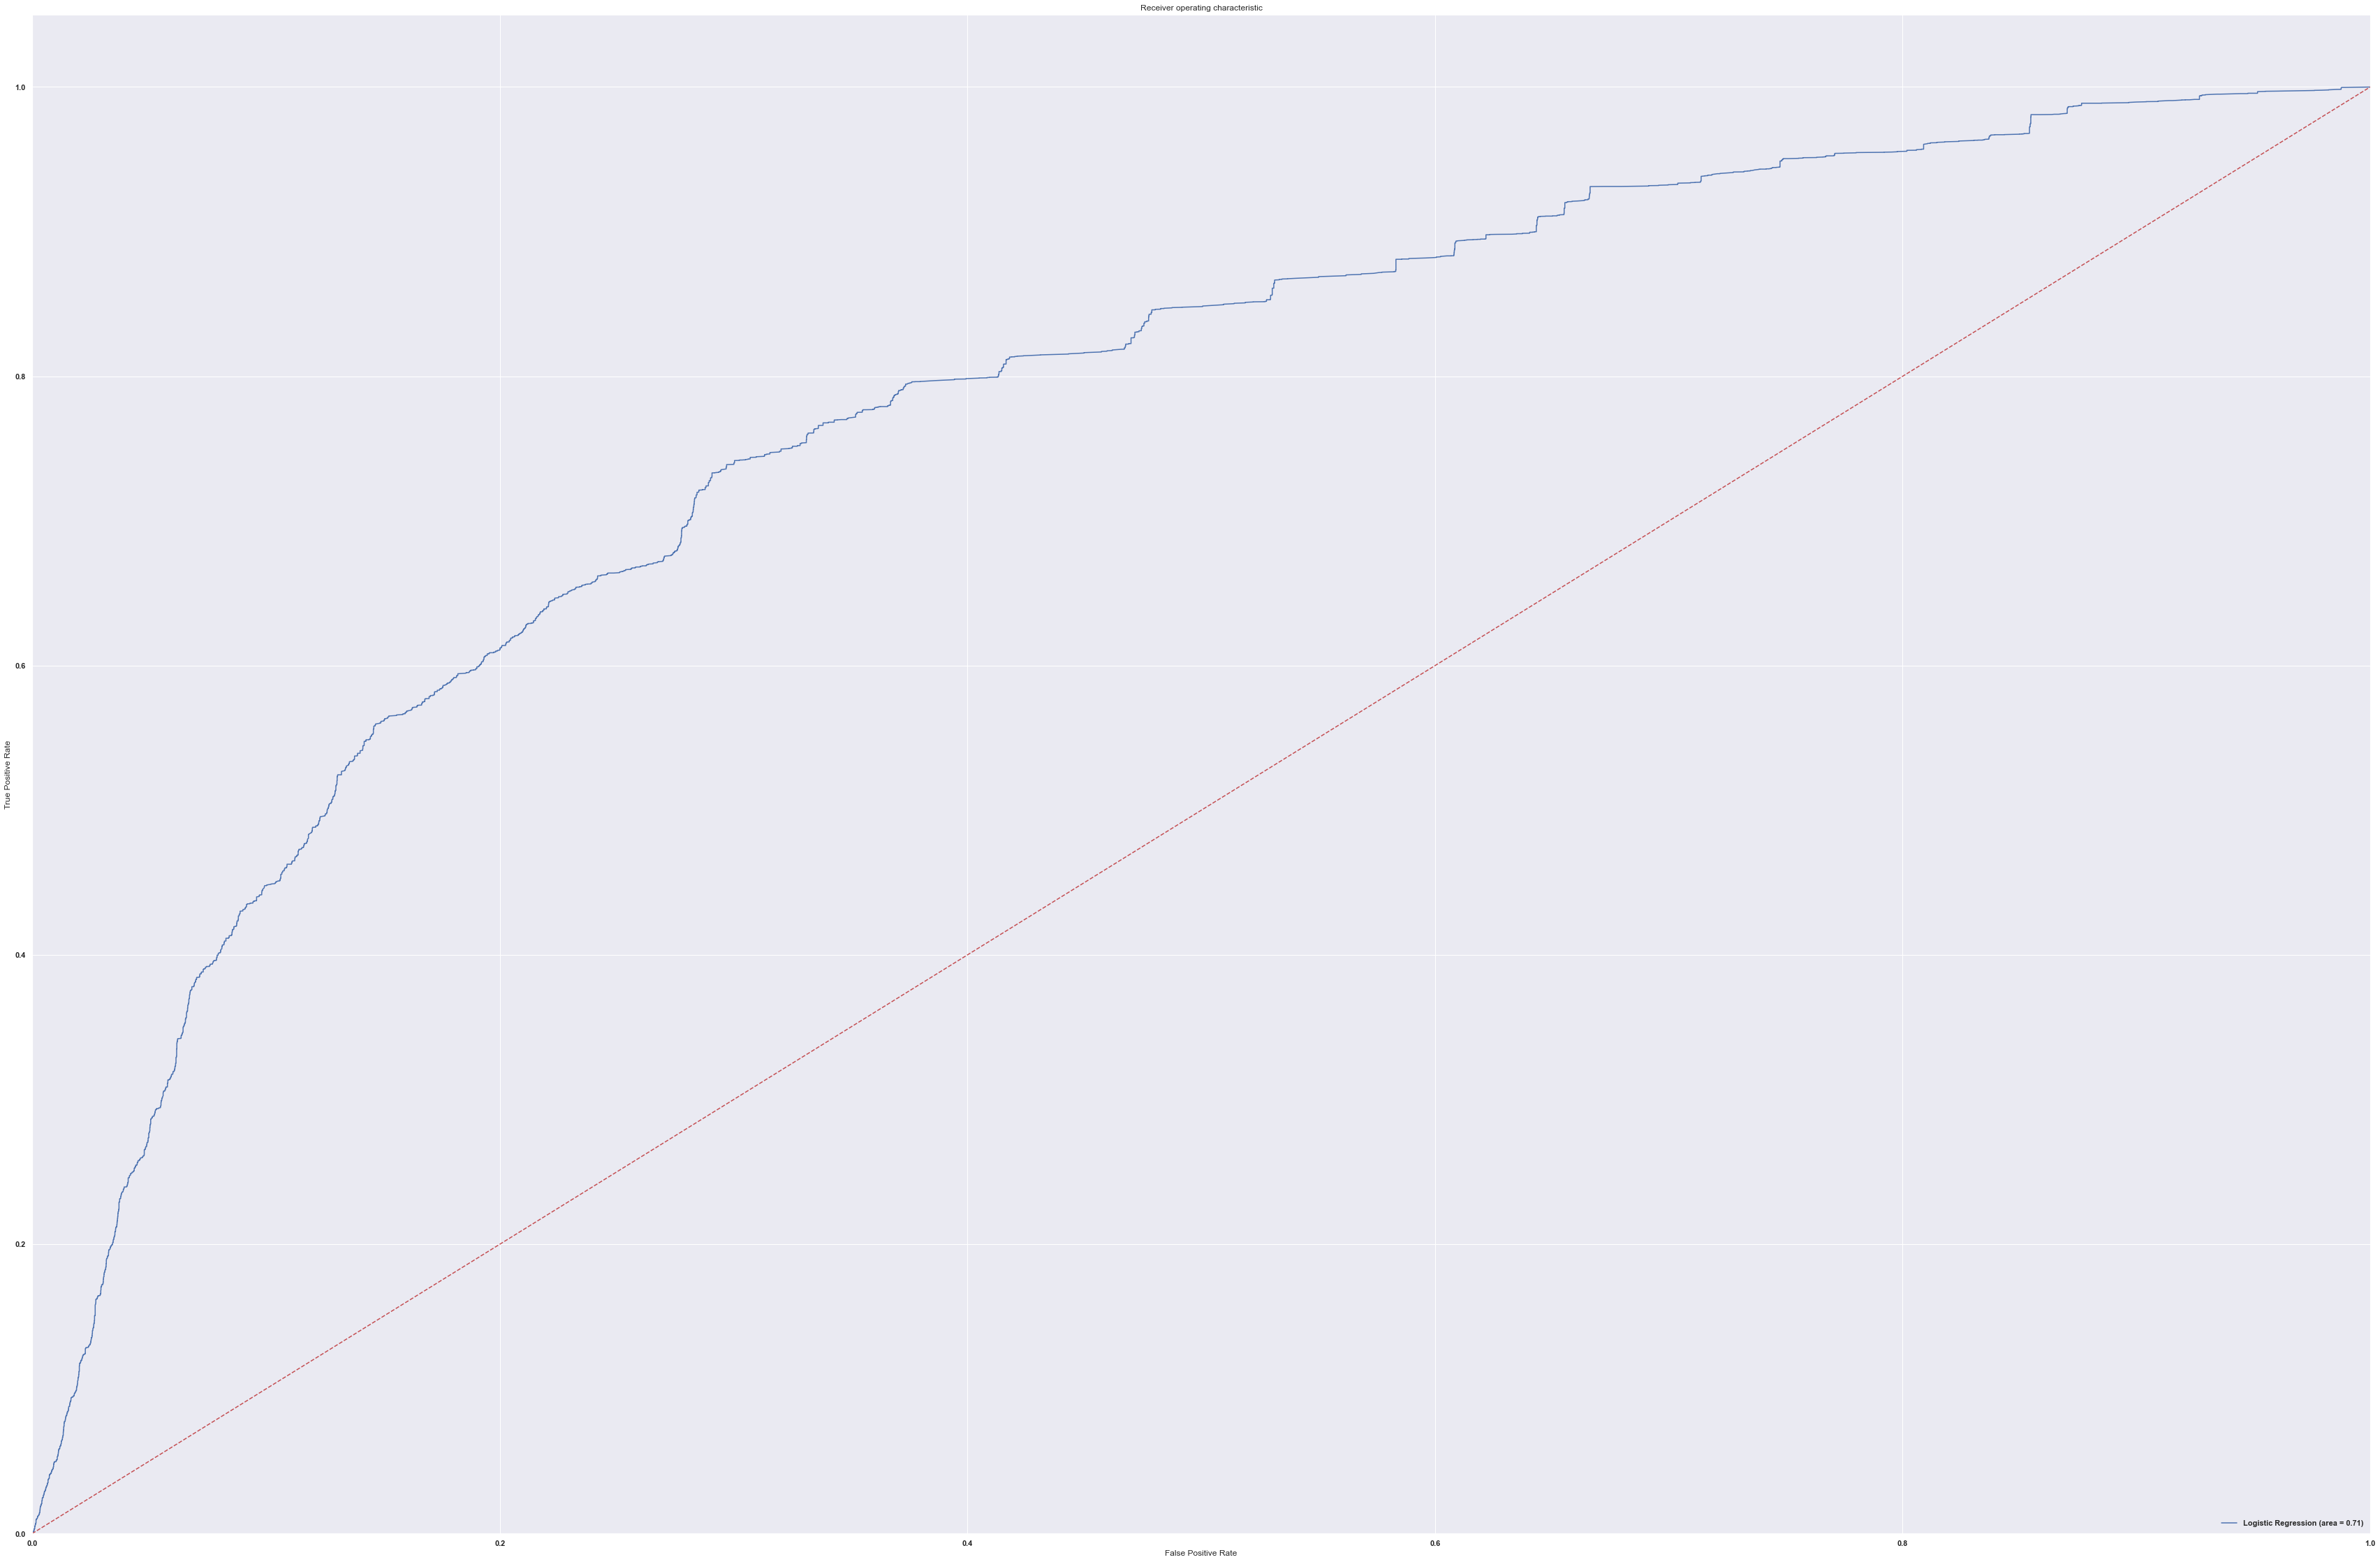

In [135]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [51]:
from scipy import stats

In [60]:
final_data.columns

Index(['age', 'duration', 'campaign', 'pdays', 'euribor3m', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_married', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'housing_yes', 'loan_yes',
       'contact_telephone', 'poutcome_nonexistent', 'y_en'],
      dtype='object')

In [58]:
fvalue, pvalue = stats.f_oneway(X,y)
print("f Value -> ", fvalue)
print("p value -> ", pvalue)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

# Insight of selected features

From the logistic model i able to obtained the three important features:- job_retired,job_students and education_university.degree. Now, i am going to obtain the insights of these three features with feature age and dependent variable 'y'.

I joined first two important features 'job_retired' and 'job_students' and created a new variable called 'job_new' and try to obtain the insight of this feature with feature 'age'.

In [114]:
copy_df = final_data.copy()

In [115]:
copy_df['job_retired_buckets'] = pd.qcut(copy_df['job_retired'], 20, labels=False, duplicates = 'drop')
mean_deposit = copy_df.groupby(['job_retired'])['y_en'].mean()
mean_deposit

job_retired
0.0    0.106567
1.0    0.252326
Name: y_en, dtype: float64

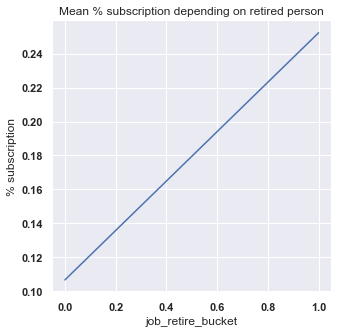

In [117]:
plt.figure(figsize=(5,5))
#plot
plt.plot(mean_deposit.index, mean_deposit.values)
plt.title('Mean % subscription depending on retired person')
plt.xlabel('job_retire_bucket')
plt.ylabel('% subscription')
plt.show()

In [118]:
copy_df[copy_df['job_retired_buckets'] <=1]['job_retired'].min()

0.0

In [119]:
copy_df[copy_df['job_retired_buckets'] <= 1]['job_retired'].max()

1.0

In [120]:
copy_df['job_student_buckets'] = pd.qcut(copy_df['job_student'], 20, labels=False, duplicates = 'drop')
mean_student = copy_df.groupby(['job_student'])['y_en'].mean()
mean_student

job_student
0.0    0.108278
1.0    0.314286
Name: y_en, dtype: float64

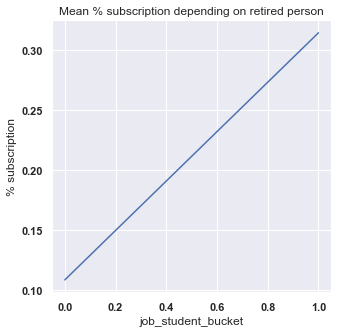

In [122]:
#plot
plt.figure(figsize=(5,5))
plt.plot(mean_student.index, mean_student.values)
plt.title('Mean % subscription depending on retired person')
plt.xlabel('job_student_bucket')
plt.ylabel('% subscription')
plt.show()

In [123]:
copy_df[copy_df['job_student_buckets'] <=1]['job_student'].min()

0.0

In [124]:
copy_df[copy_df['job_student_buckets'] <=1]['job_student'].max()

1.0

In [125]:
copy_df['edu_buckets'] = pd.qcut(copy_df['education_university.degree'], 20, labels=False, duplicates = 'drop')
mean_student = copy_df.groupby(['education_university.degree'])['y_en'].mean()
mean_student

education_university.degree
0.0    0.102343
1.0    0.137245
Name: y_en, dtype: float64

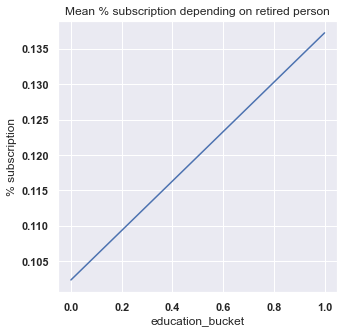

In [127]:
#plot
plt.figure(figsize=(5,5))
plt.plot(mean_student.index, mean_student.values)
plt.title('Mean % subscription depending on retired person')
plt.xlabel('education_bucket')
plt.ylabel('% subscription')
plt.show()

observations:-

only 1% of people who are retired from their job and students are interested to subscribe the deposite and the probablity of subscribtion of both features are 25% and 30%. People who have some kind of degree from university will subscribe the deposite 135%. which is higher than the other two categories.So, client should make their camapign stratiegy to keep focuse on these gropus and enhance their business profite.

# Naive Bayes Model

In [128]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

Evaluating Model

After model generation, check the accuracy using actual and predicted values.

In [129]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7093802726982534


In [130]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[8414 2495]
 [3878 7142]]


In [131]:
#transform confusion matrix into array
#the matrix is stored in a vaiable called confmtrx
confmtrx = np.array(confusion_matrix)
#Create DataFrame from confmtrx array 
#rows for test: subscribe, No_subscribe designation as index 
#columns for preds: Pred_subscribe, Pred_Nosubscribe as column
pd.DataFrame(confmtrx, index=['No_Subscribe','Subscribe'],
columns=['Predicted_No_Subscribe', 'Predicted_Subscribe', ])

,Predicted_No_Subscribe,Predicted_Subscribe
No_Subscribe,8414,2495
Subscribe,3878,7142


In [132]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.77      0.73     10909
           1       0.74      0.65      0.69     11020

    accuracy                           0.71     21929
   macro avg       0.71      0.71      0.71     21929
weighted avg       0.71      0.71      0.71     21929



Naive Bayes giving us a good results as compare to the Logitic regression, beacuse the classes in this model is evenly classified and they are giving the good support to the classes.

# Support Vector Machine Learning

In [226]:
from sklearn.svm import SVC
from sklearn import metrics

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=15,stratify = y_sm)


In [229]:

svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.7875416115645948


# Default Linear Kernel

In [235]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.7150804870263122


In [236]:
#print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71     10909
           1       0.72      0.71      0.72     11020

    accuracy                           0.72     21929
   macro avg       0.72      0.72      0.72     21929
weighted avg       0.72      0.72      0.72     21929



# Radial Basis Kernel

In [230]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.7875416115645948


In [238]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85     10909
           1       0.90      0.78      0.83     11020

    accuracy                           0.84     21929
   macro avg       0.85      0.84      0.84     21929
weighted avg       0.85      0.84      0.84     21929



# Polynomial Kernel

In [240]:
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.7845775001140043


In [241]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77     10909
           1       0.75      0.85      0.80     11020

    accuracy                           0.78     21929
   macro avg       0.79      0.78      0.78     21929
weighted avg       0.79      0.78      0.78     21929



Radial Basis kernel giving us the best result as compare to other models.

# Performing K-fold cross validation with different kernels

# K-Mean Clustring

In [113]:
#splitting the data into train and test data
from sklearn.model_selection import train_test_split
# split into inputs and outputs
X = final_data.drop('y_en',axis = 1)
y= final_data['y_en']


In [114]:
from sklearn.cluster import KMeans

In [116]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

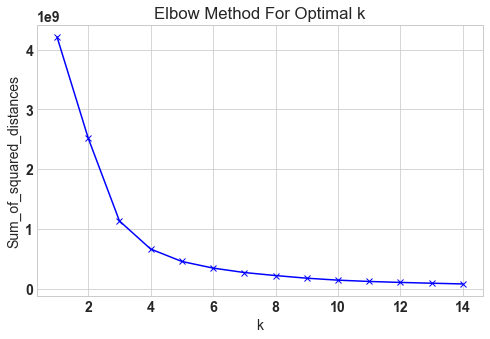

In [117]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In the plot above the elbow is at k=3 indicating the optimal k for this dataset is 3.


In [118]:
kmean = KMeans(n_clusters = 3,init= 'k-means++', random_state = 0)
y_kmeans = kmean.fit_predict(X)
Label = kmean.labels_
Label

array([2, 0, 2, ..., 0, 2, 0])

In [119]:
centers = kmean.cluster_centers_


Inertia
Inertia is not a normalized metric.

The lower values of inertia are better and zero is optimal.

But in very high-dimensional spaces, euclidean distances tend to become inflated (this is an instance of curse of dimensionality).

Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.

We can calculate model inertia as follows:-

In [120]:
kmean.inertia_

1133719203.6671975

The lesser the model inertia, the better the model fit.

We can see that the model has very high inertia. So, this is not a good model fit to the data.

In [121]:
labels = kmean.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 35036 out of 41188 samples were correctly labeled.


In [122]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.85


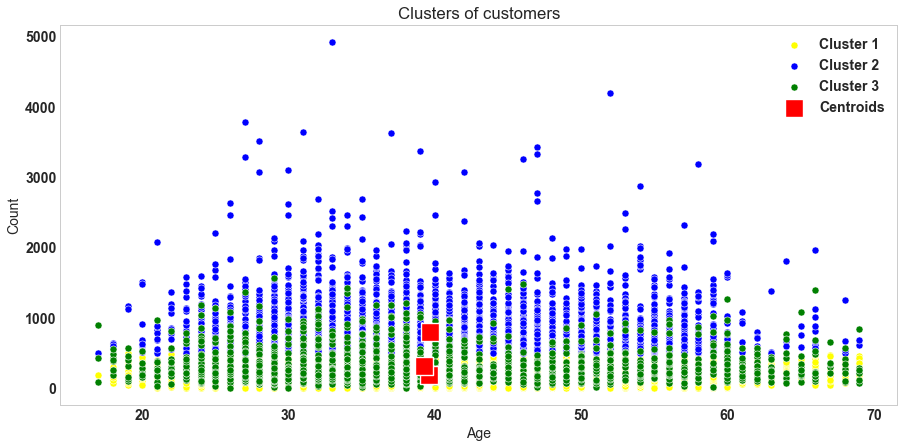

In [123]:
# Visualising the clusters
X = np.array(X)
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)

sns.scatterplot(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

This graph showing us a wrong prediction of clusters. Almost all three cluster's centers belong to one group of data. Therefore, to get the correct predictions I am going to apply the Principle Component Analaysis on raw data to reduce the number of features.

# Principle Component Analysis(PCA)

In [124]:
from sklearn.decomposition import PCA

In [125]:
pca = PCA(random_state=123)
X_pca = pca.fit(X)
score_pca = pca.transform(X)

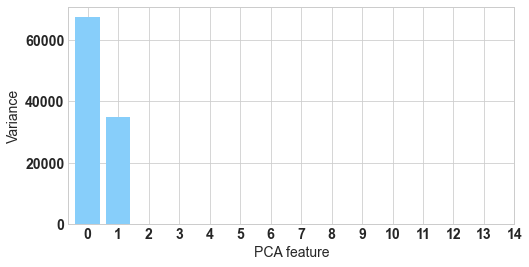

In [126]:
 features = range(pca.n_components_)

plt.figure(figsize=(8,4))
plt.bar(features[:5], pca.explained_variance_[:5], color='lightskyblue')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:15])
plt.show()

In [127]:
pca = PCA(n_components=2,svd_solver='full')
X_pca = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

# X_reduced, X_test_reduced, Y_Train, Y_Test = train_test_split(X_pca, y, test_size = 0.30, random_state = 101)

[0.65899788 0.34003482]


In [128]:
print("original data shape:",X.shape)
print("reduced data shape:",X_pca.shape)

original data shape: (41188, 24)
reduced data shape: (41188, 2)


In [129]:
X_pca

array([[ 241.20719808,  943.76546934],
       [ -78.67721141,  -31.01115168],
       [ -97.9379258 ,  967.86067324],
       ...,
       [-175.436706  ,  -24.14591486],
       [ 285.23533316,  942.6369569 ],
       [  11.0932971 ,  -37.39608196]])

In [130]:
def value(x):
    if x =='yes':
        return 1
    else:
        return 0
df_value= df['y'].apply(value)

Text(0, 0.5, 'Second Principal Component')

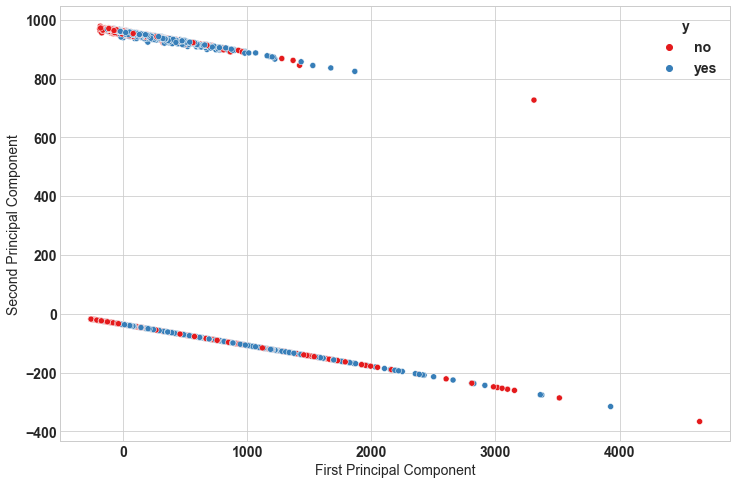

In [131]:
ax = plt.figure(figsize=(12,8))
sns.scatterplot(X_pca[:,0], X_pca[:,1],hue=df['y'], palette ='Set1' )
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [132]:
df_pc = pd.DataFrame(pca.components_, columns = final_data.iloc[:,:-1].columns)
df_pc

,age,duration,campaign,pdays,euribor3m,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,job_unemployed,marital_married,education_high.school,education_illiterate,education_professional.course,education_university.degree,housing_yes,loan_yes,contact_telephone,poutcome_nonexistent
0,-0.000152,0.997486,-0.000090,-0.070867,-0.000320,0.000015,0.000002,-0.000003,-1.302475e-06,0.000012,...,-0.000003,-0.000011,0.000008,1.281883e-07,-0.000011,-0.000019,-0.000012,1.729659e-07,-0.000060,-0.000049
1,-0.000295,-0.070868,-0.000289,-0.997481,-0.002731,-0.000149,-0.000019,0.000002,-1.733483e-07,0.000076,...,0.000020,-0.000082,-0.000014,2.172192e-07,0.000008,0.000093,0.000031,1.427767e-07,-0.000298,-0.000903


Text(113.5, 0.5, 'Principal Components')

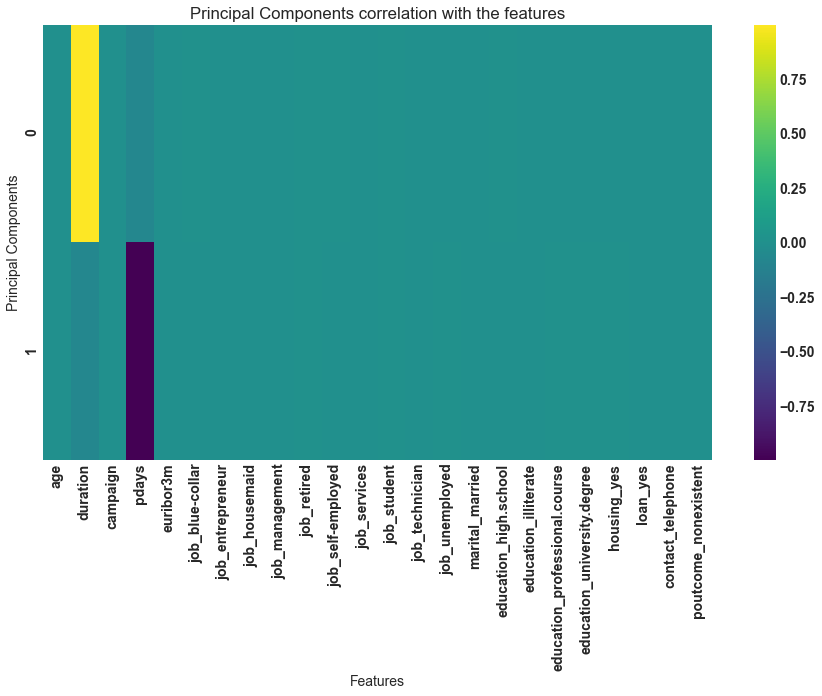

In [133]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_pc, cmap='viridis')
plt.title('Principal Components correlation with the features')
plt.xlabel('Features')
plt.ylabel('Principal Components')

# K-mean Clustring on PCA analysis Data

In [161]:
wcss = []
for i in range(1,21):
    kmean_pca = KMeans(n_clusters = i,init = 'k-means++',random_state = 42)
    kmean_pca.fit(X_pca)
    wcss.append(kmean_pca.inertia_)

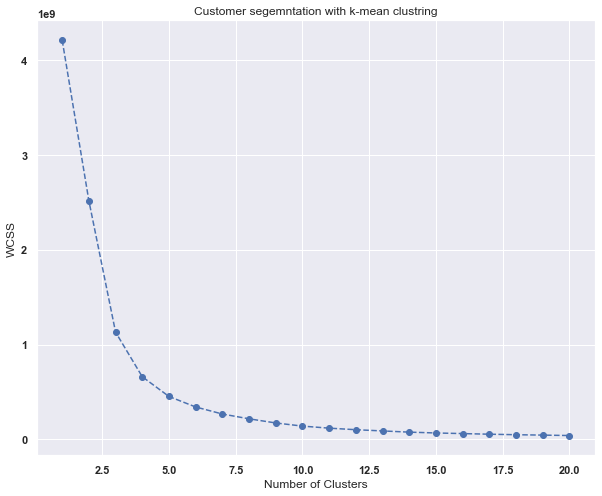

In [162]:
plt.figure(figsize = (10,8))
plt.plot(range(1,21),wcss,marker = 'o',linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Customer segemntation with k-mean clustring')
plt.show()

In [173]:
kmean_pca = KMeans(n_clusters = 3,init = 'k-means++',random_state=42)

In [174]:
Model = kmean_pca.fit_transform(X_pca)
Model

array([[1.18305015e+02, 1.02621672e+03, 1.06138492e+03],
       [1.00168564e+03, 1.14502684e+00, 6.23323840e+02],
       [2.21721081e+02, 9.98970776e+02, 1.22310974e+03],
       ...,
       [1.01899689e+03, 9.58578207e+01, 7.20326375e+02],
       [1.62334725e+02, 1.03977356e+03, 1.04861366e+03],
       [9.93871317e+02, 9.11422039e+01, 5.33326850e+02]])

In [208]:
label = kmean.labels_
label

array([2, 0, 2, ..., 0, 2, 0])

In [209]:
principal_df = pd.DataFrame(data = Model
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
principal_df.head()

,principal component 1,principal component 2,principal component 3
0,118.305015,1026.216719,1061.384923
1,1001.685642,1.145027,623.323840
2,221.721081,998.970776,1223.109740
3,1009.944799,317.144925,307.325524
4,582.301945,1226.973899,999.685288


In [210]:
df_clusters = df.iloc[:,:-1].copy()
df_clusters['label'] = label
df_clusters.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,label
0,17.0,student,single,NaN,no,yes,no,cellular,aug,wed,...,4,0.0,success,-2.9,92.201,-31.4,0.884,5076.2,no,2
1,17.0,student,single,Basic,no,yes,no,cellular,aug,fri,...,999,0.0,failure,-2.9,92.201,-31.4,0.869,5076.2,no,0
2,17.0,student,single,Basic,no,yes,no,cellular,aug,fri,...,4,0.0,success,-2.9,92.201,-31.4,0.869,5076.2,no,2
3,17.0,student,single,Basic,no,NaN,NaN,cellular,aug,fri,...,999,0.0,failure,-2.9,92.201,-31.4,0.869,5076.2,yes,1
4,17.0,student,single,NaN,no,no,yes,cellular,oct,tue,...,2,0.0,success,-3.4,92.431,-41.8,0.742,5017.5,yes,2


In [211]:
colors = ['#DF2020', '#81DF20', '#2095DF']
df_clusters['c'] = df_clusters.label.map({0:colors[0], 1:colors[1]})
df_clusters.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,label,c
0,17.0,student,single,NaN,no,yes,no,cellular,aug,wed,...,0.0,success,-2.9,92.201,-31.4,0.884,5076.2,no,2,NaN
1,17.0,student,single,Basic,no,yes,no,cellular,aug,fri,...,0.0,failure,-2.9,92.201,-31.4,0.869,5076.2,no,0,#DF2020
2,17.0,student,single,Basic,no,yes,no,cellular,aug,fri,...,0.0,success,-2.9,92.201,-31.4,0.869,5076.2,no,2,NaN
3,17.0,student,single,Basic,no,NaN,NaN,cellular,aug,fri,...,0.0,failure,-2.9,92.201,-31.4,0.869,5076.2,yes,1,#81DF20
4,17.0,student,single,NaN,no,no,yes,cellular,oct,tue,...,0.0,success,-3.4,92.431,-41.8,0.742,5017.5,yes,2,NaN


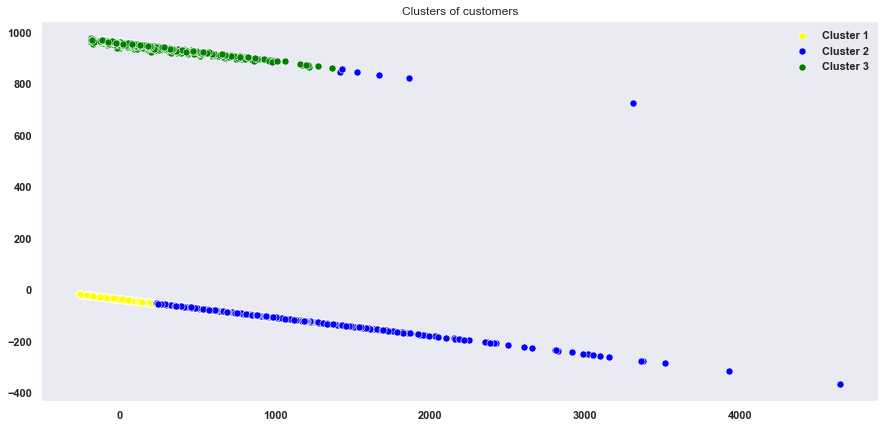

In [220]:
# Visualising the clusters
X = np.array(X_pca)
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)


plt.grid(False)
plt.title('Clusters of customers')

plt.legend()
plt.show()

This graph shows the clusters of customers of PCA analysised data.

In [179]:
df_clusters['lable'].value_counts()

0    34859
1     4820
2     1509
Name: lable, dtype: int64

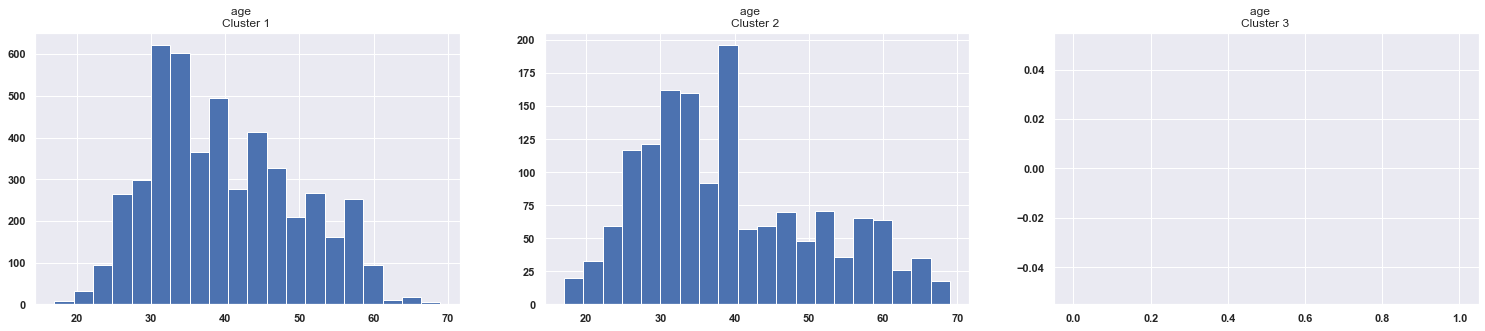

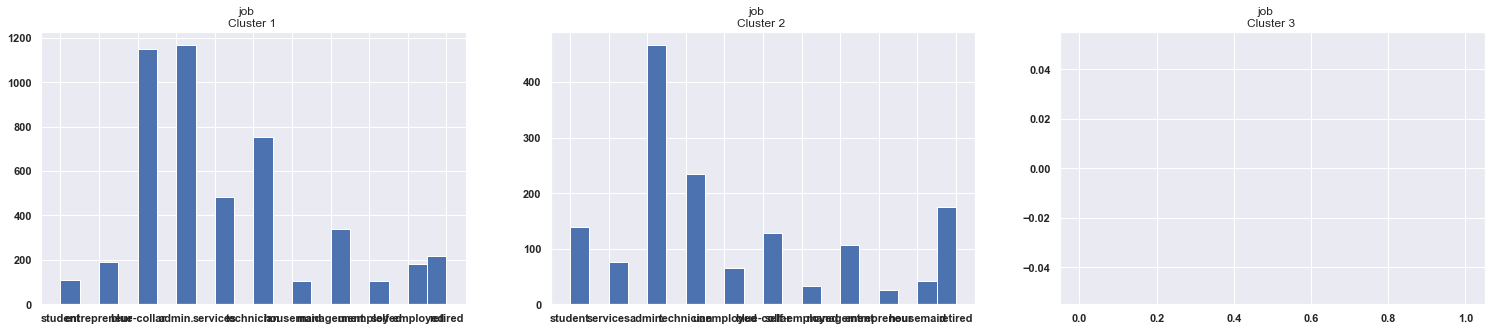

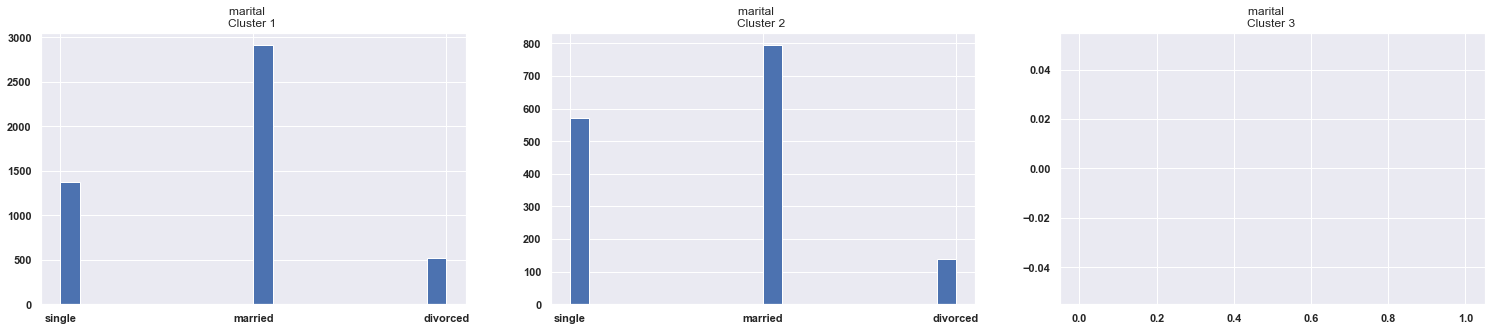

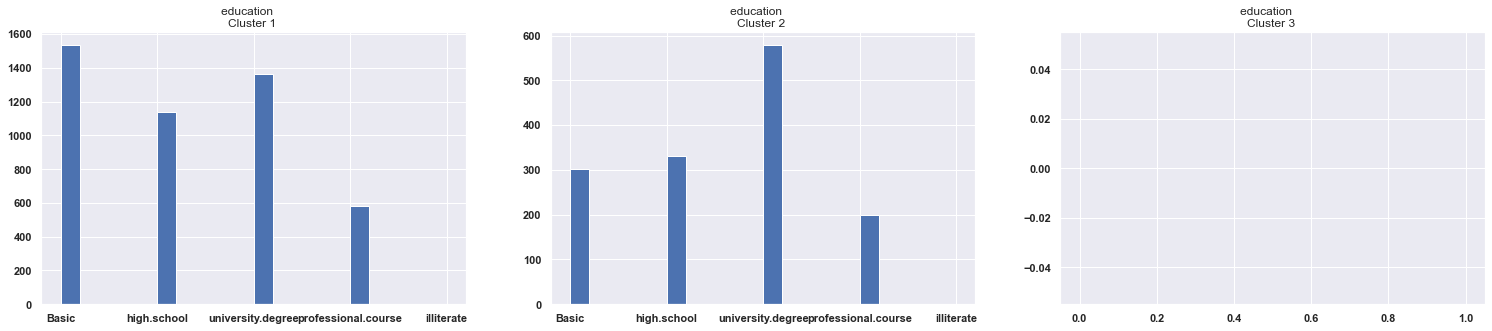

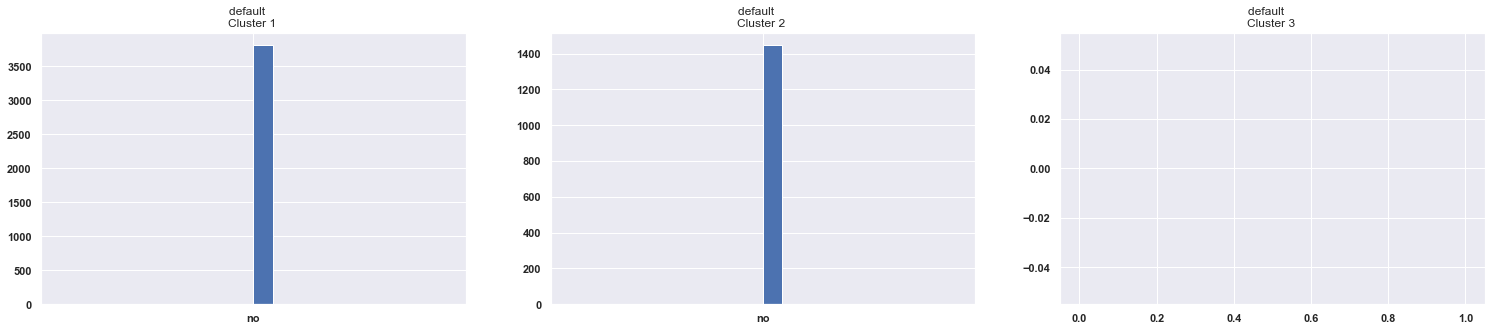

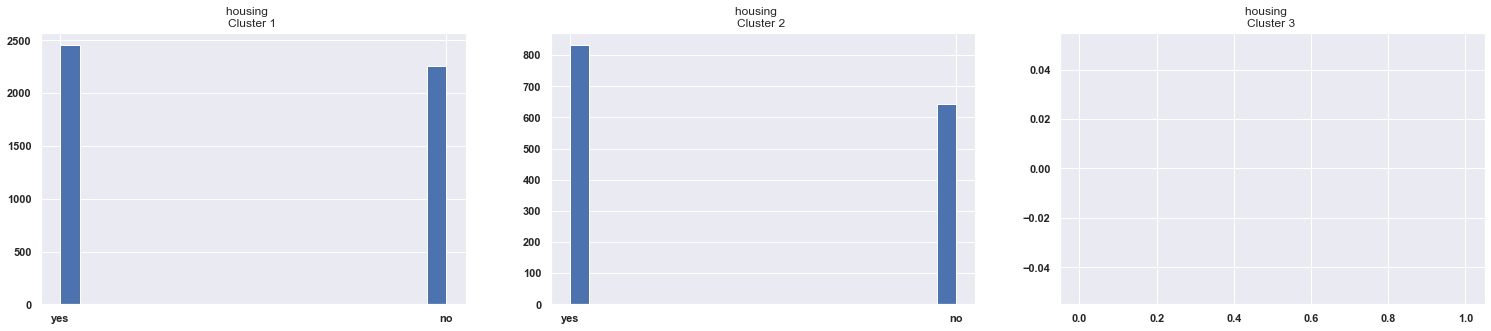

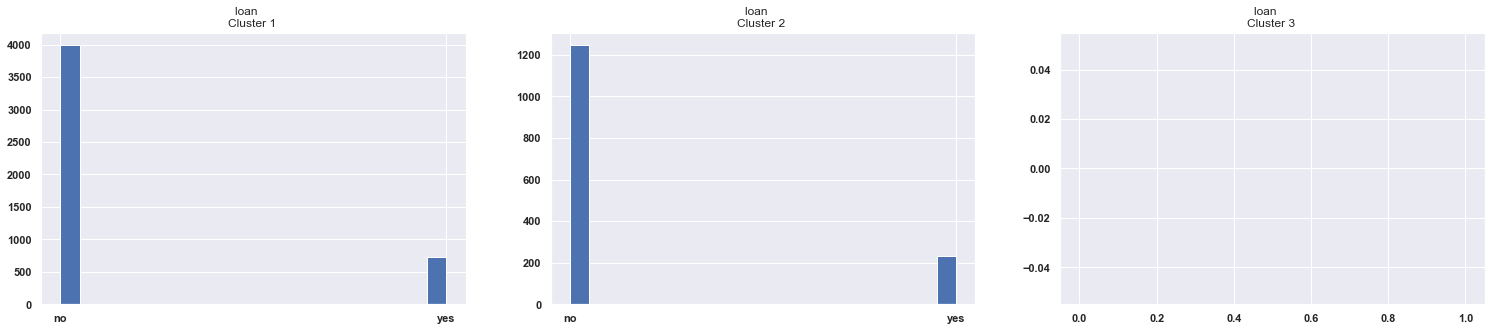

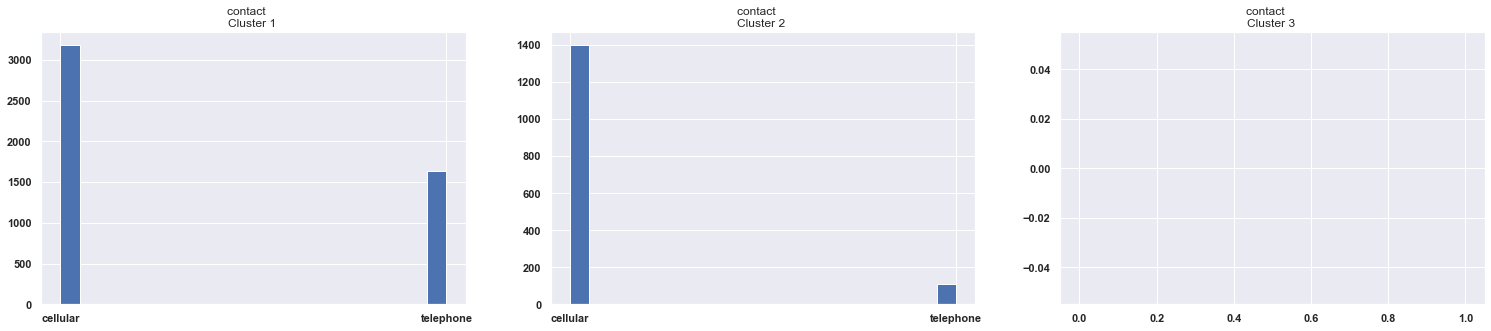

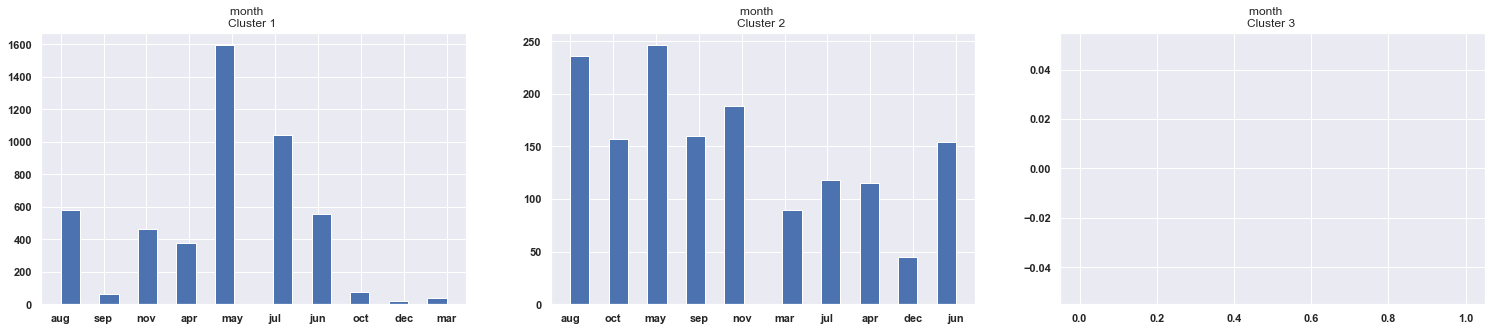

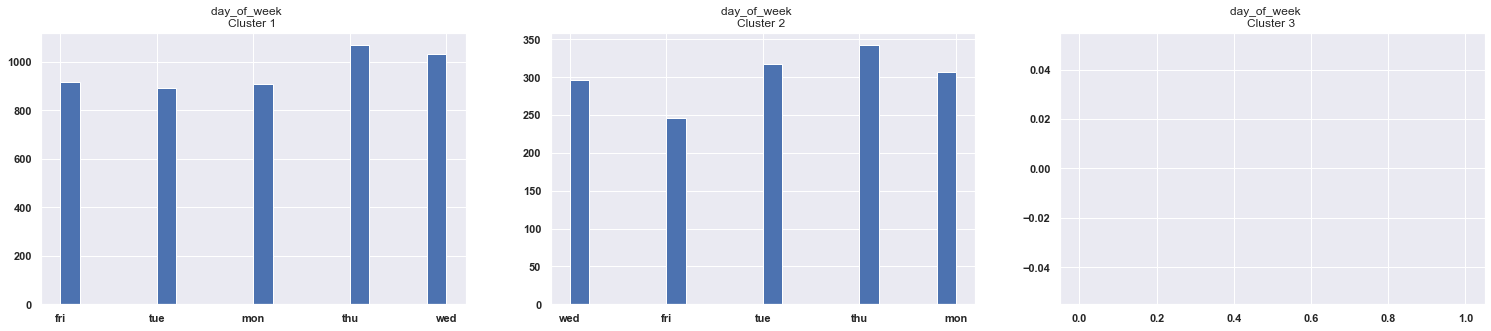

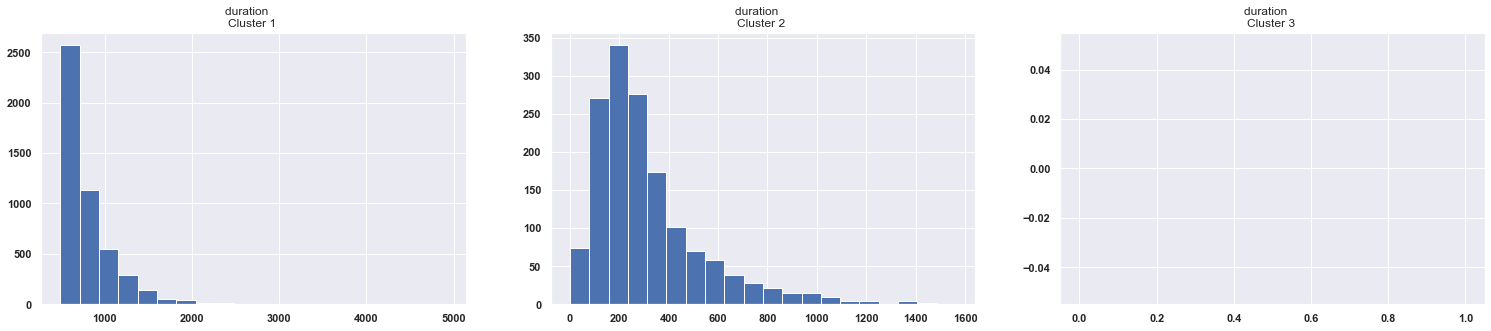

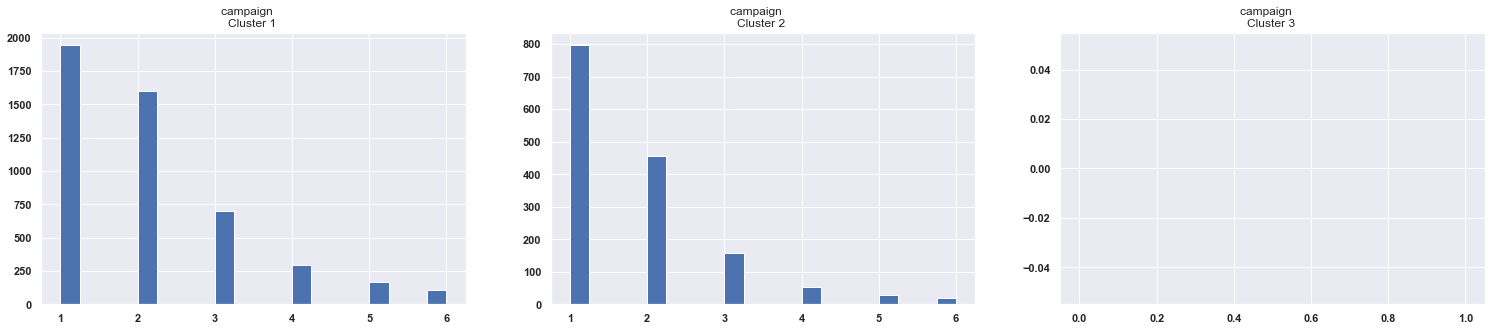

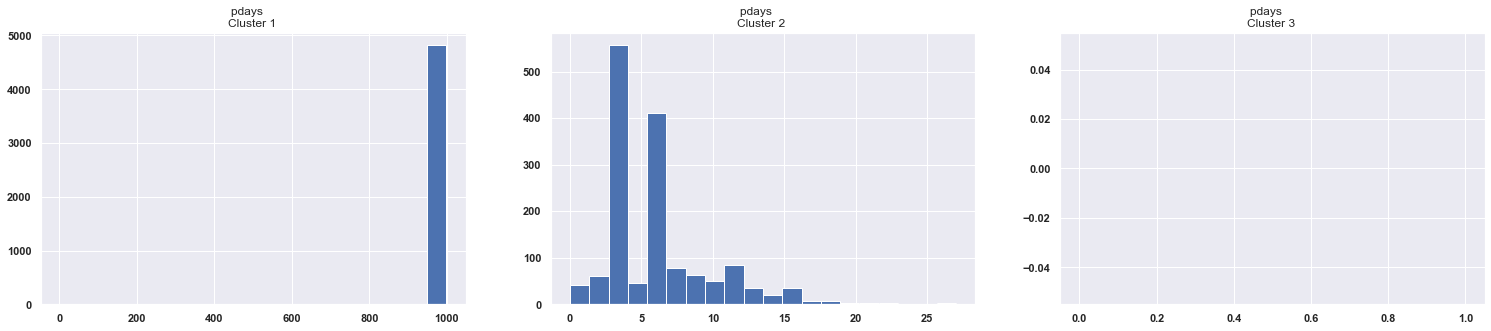

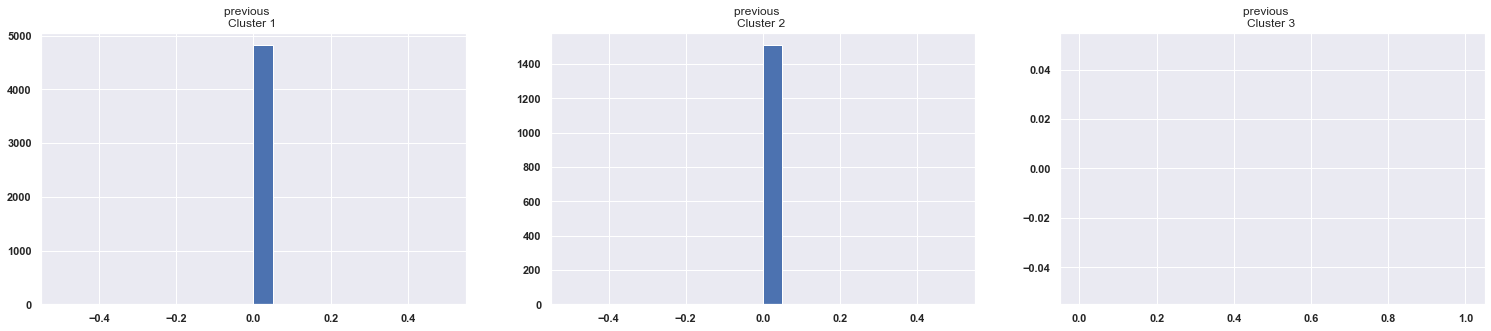

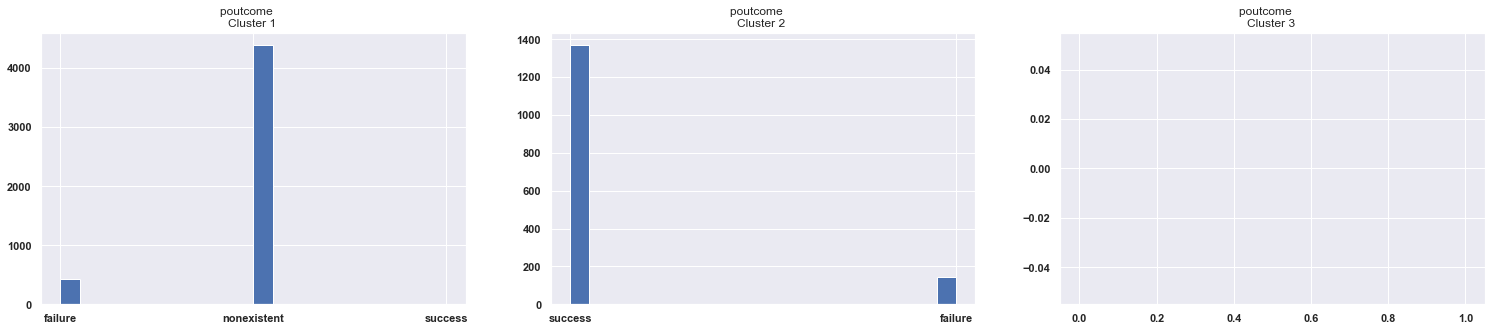

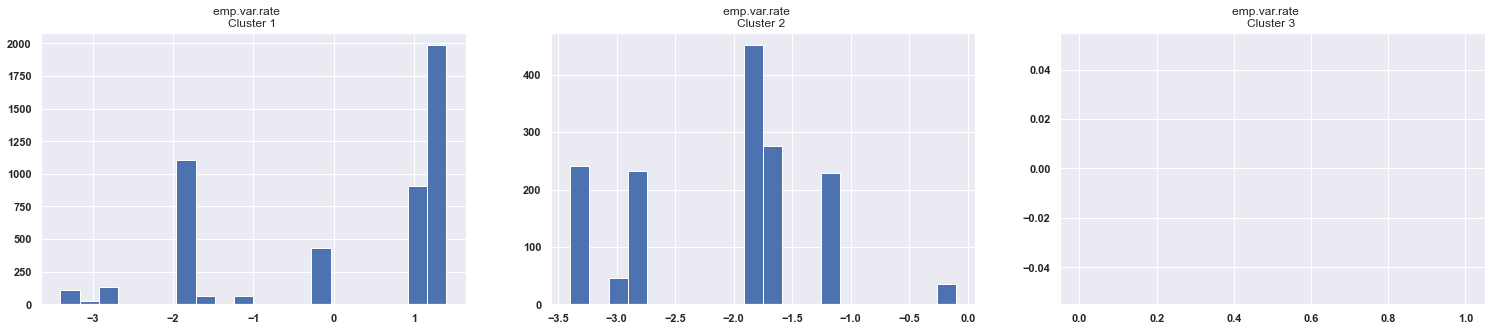

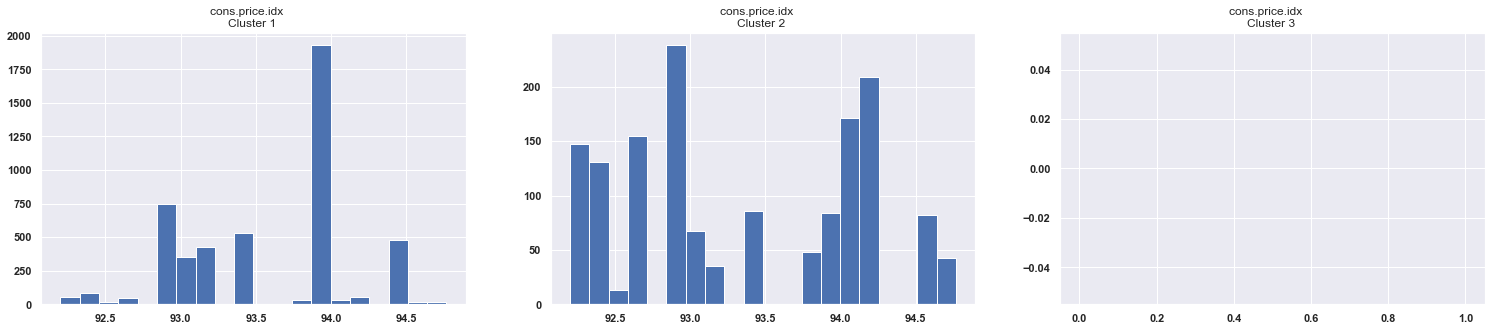

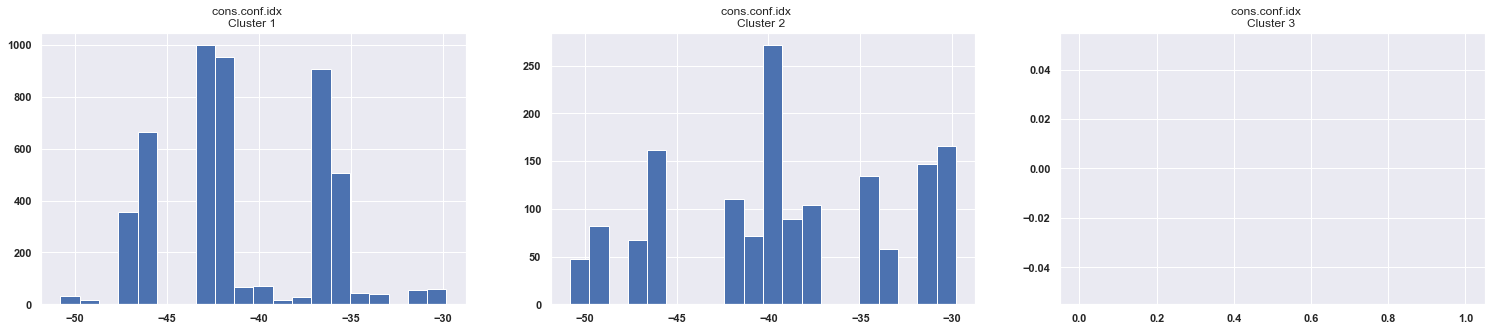

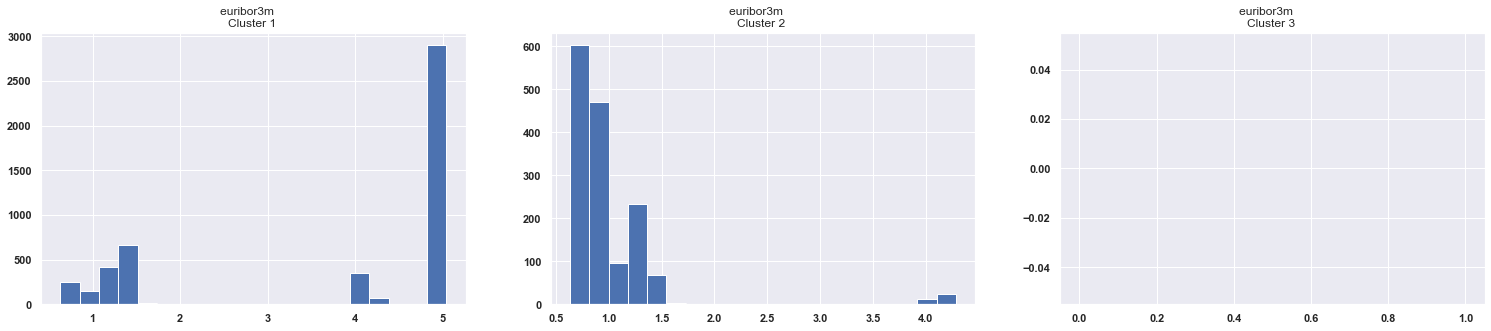

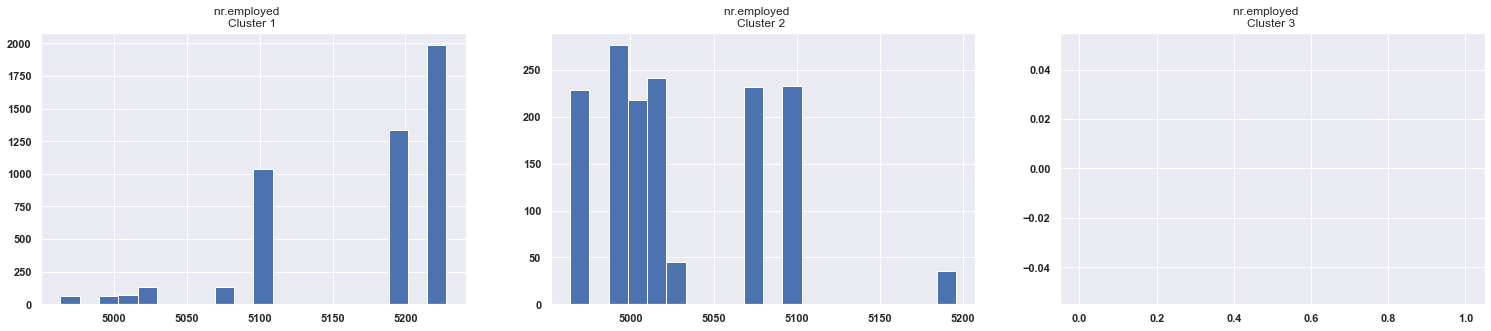

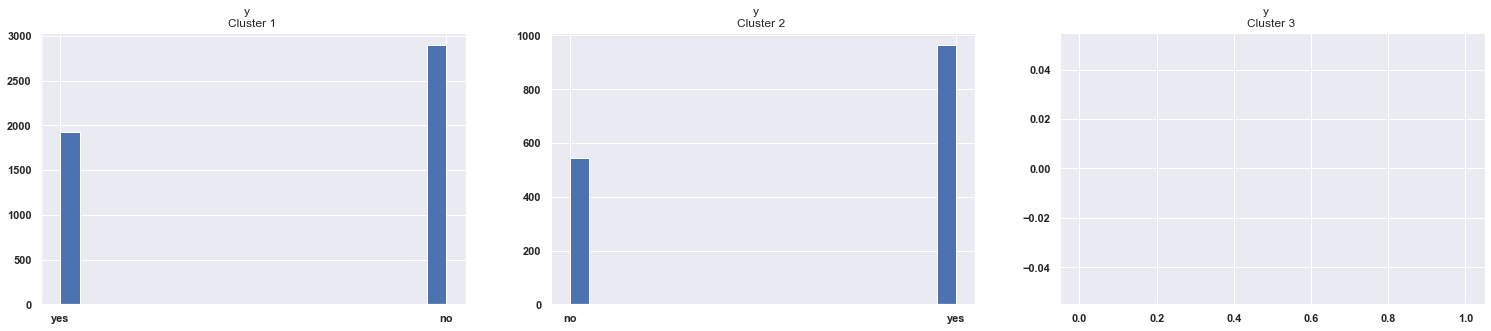

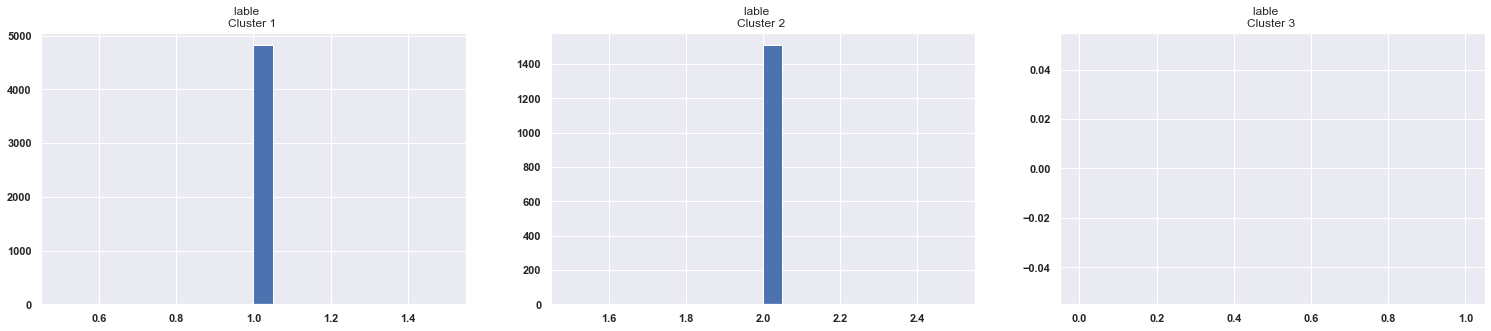

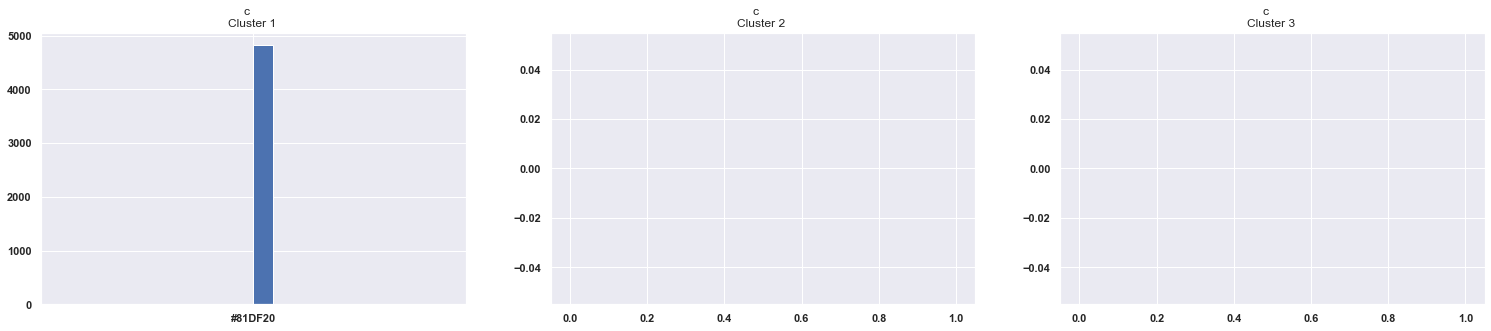

In [180]:
# Plot the histogram of various clusters
for i in df_clusters.columns:
    plt.figure(figsize = (35, 5))
    for j in range(1,4):
        plt.subplot(1,4,j+1)
        cluster = df_clusters[df_clusters['lable'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{}    \nCluster {} '.format(i,j))
  
    plt.show()

In [181]:
cluster_name = {0: 'Not Interested',1: 'Interested', 2: 'least Interested'}
df_clusters.lable = [cluster_name[item] for item in df_clusters.lable]
df_clusters.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,lable,c
0,17.0,student,single,NaN,no,yes,no,cellular,aug,wed,...,0.0,success,-2.9,92.201,-31.4,0.884,5076.2,no,least Interested,NaN
1,17.0,student,single,Basic,no,yes,no,cellular,aug,fri,...,0.0,failure,-2.9,92.201,-31.4,0.869,5076.2,no,Not Interested,#DF2020
2,17.0,student,single,Basic,no,yes,no,cellular,aug,fri,...,0.0,success,-2.9,92.201,-31.4,0.869,5076.2,no,least Interested,NaN
3,17.0,student,single,Basic,no,NaN,NaN,cellular,aug,fri,...,0.0,failure,-2.9,92.201,-31.4,0.869,5076.2,yes,Interested,#81DF20
4,17.0,student,single,NaN,no,no,yes,cellular,oct,tue,...,0.0,success,-3.4,92.431,-41.8,0.742,5017.5,yes,least Interested,NaN


<AxesSubplot:xlabel='age', ylabel='count'>

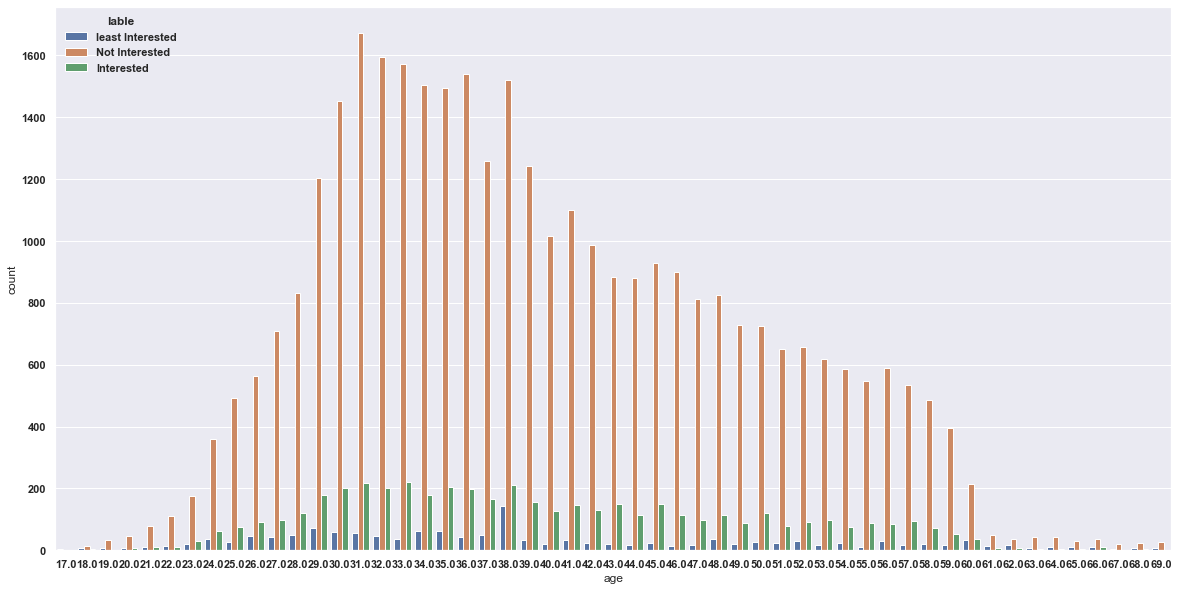

In [182]:
sns.set(rc={'figure.figsize':(20,10)})

sns.countplot(x="age", hue='lable', data=df_clusters)


<AxesSubplot:xlabel='job', ylabel='count'>

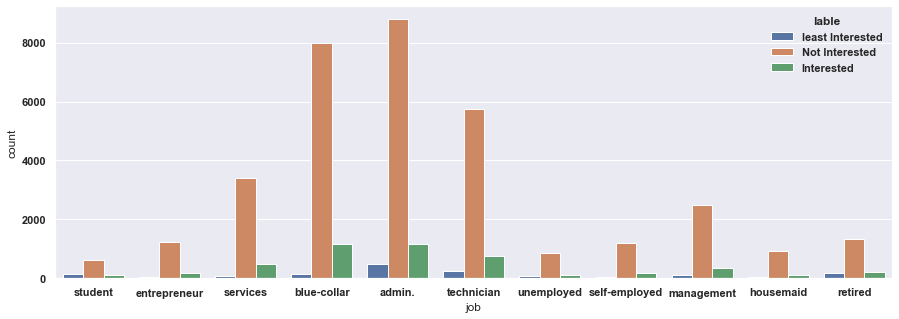

In [183]:
sns.set(rc={'figure.figsize':(15,5)})

sns.countplot(x="job", hue='lable', data=df_clusters)


<AxesSubplot:xlabel='education', ylabel='count'>

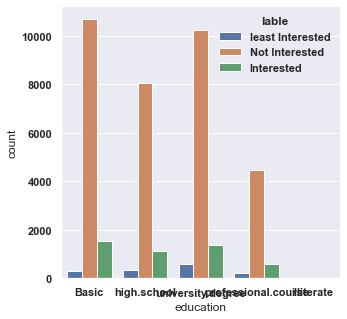

In [147]:
sns.set(rc={'figure.figsize':(5,5)})

sns.countplot(x="education", hue='lable', data=df_clusters)


<AxesSubplot:xlabel='contact', ylabel='count'>

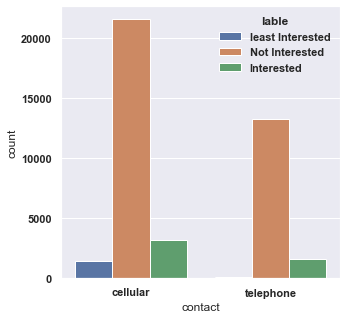

In [148]:
sns.set(rc={'figure.figsize':(5,5)})

sns.countplot(x="contact", hue='lable', data=df_clusters)


<AxesSubplot:xlabel='housing', ylabel='count'>

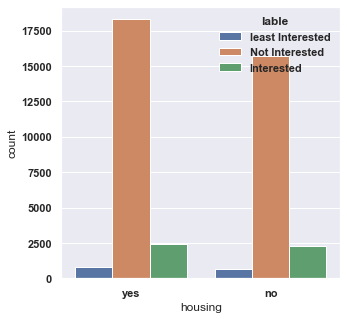

In [149]:
sns.set(rc={'figure.figsize':(5,5)})

sns.countplot(x="housing", hue='lable', data=df_clusters)


<AxesSubplot:xlabel='loan', ylabel='count'>

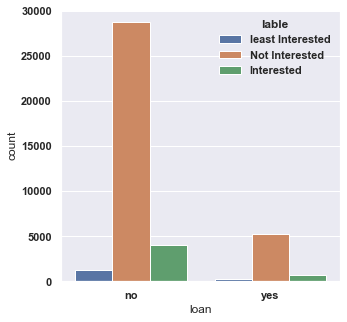

In [150]:
sns.set(rc={'figure.figsize':(5,5)})

sns.countplot(x="loan", hue='lable', data=df_clusters)

<AxesSubplot:xlabel='default', ylabel='count'>

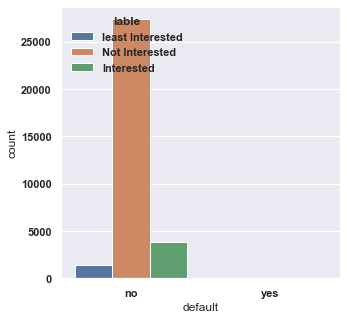

In [151]:
sns.set(rc={'figure.figsize':(5,5)})

sns.countplot(x="default", hue='lable', data=df_clusters)


<AxesSubplot:xlabel='contact', ylabel='count'>

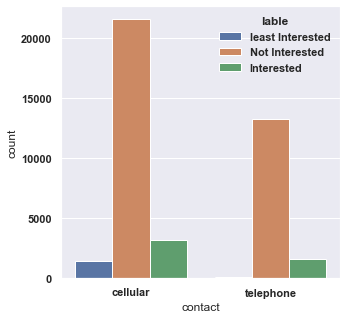

In [152]:
sns.set(rc={'figure.figsize':(5,5)})

sns.countplot(x="contact", hue='lable', data=df_clusters)


<AxesSubplot:xlabel='month', ylabel='count'>

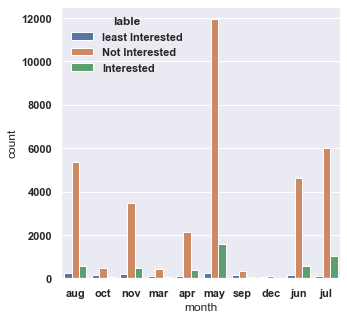

In [153]:
sns.set(rc={'figure.figsize':(5,5)})

sns.countplot(x="month", hue='lable', data=df_clusters)


From the above analysis I conclude that the most of the  data belong to only twp clusters and they were correclty labeld according to these clusters so, we donot need to classify the customers into further groups. Client can fully trust given two classification of customers.

In [184]:
df_c = final_data.iloc[:,:-1].copy()
df_c['lable']  = label
df_c.head()

,age,duration,campaign,pdays,euribor3m,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,marital_married,education_high.school,education_illiterate,education_professional.course,education_university.degree,housing_yes,loan_yes,contact_telephone,poutcome_nonexistent,lable
0,17.0,432.0,3.0,4.0,0.884,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
1,17.0,182.0,2.0,999.0,0.869,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,17.0,92.0,3.0,4.0,0.869,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
3,17.0,498.0,2.0,999.0,0.869,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,17.0,896.0,1.0,2.0,0.742,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2


In [185]:
x = df_c.iloc[:,:-1]
y = df_c['lable']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.03, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(39952, 24) (1236, 24) (39952,) (1236,)


In [186]:
x.head()

,age,duration,campaign,pdays,euribor3m,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,job_unemployed,marital_married,education_high.school,education_illiterate,education_professional.course,education_university.degree,housing_yes,loan_yes,contact_telephone,poutcome_nonexistent
0,17.0,432.0,3.0,4.0,0.884,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,17.0,182.0,2.0,999.0,0.869,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,17.0,92.0,3.0,4.0,0.869,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,17.0,498.0,2.0,999.0,0.869,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17.0,896.0,1.0,2.0,0.742,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [187]:
logreg = LogisticRegression(solver = 'lbfgs',multi_class = 'auto',class_weight = None)
logreg.fit(x_train, y_train)

LogisticRegression()

In [188]:
predictions = logreg.predict(x_test)
predictions

array([0, 0, 0, ..., 0, 1, 0])

In [189]:
score = logreg.score(x_test, y_test)
print(score)

1.0


In [190]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       1.00      1.00      1.00       156
           2       1.00      1.00      1.00        45

    accuracy                           1.00      1236
   macro avg       1.00      1.00      1.00      1236
weighted avg       1.00      1.00      1.00      1236



From the classification report we can see that all attributes are giving us a 100% accuracy.Meaning this logistic regression model which have three clusters able to predicte all test and train data correclty.
client can see that from the "support" attribute majority of cluster belong to those people who are not interested to subscribe the deposite as well as few people belong to the cluster 2 who are least interested 
to subscribe the deposite.

# Association Rule Mining

In [191]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [192]:
df1.columns

Index(['age', 'duration', 'campaign', 'pdays', 'euribor3m', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_married', 'marital_single',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'housing_yes', 'loan_yes', 'contact_telephone', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

In [193]:
api_df = df1.drop(['age', 'duration', 'campaign', 'pdays', 'euribor3m'],axis=1)

In [198]:
#call apriori function and pass minimum support here we are passing 7%. means 7 times in total number of transaction that item was present.
frequent_customers = apriori(api_df, min_support=0.07, use_colnames=True)

In [199]:
#it will generate frequent itemsets using two step approch
frequent_customers

,support,itemsets
0,0.224677,(job_blue-collar)
1,0.070992,(job_management)
2,0.096363,(job_services)
3,0.163713,(job_technician)
4,0.605225,(marital_married)
...,...,...
69,0.165364,"(contact_telephone, housing_yes, poutcome_none..."
70,0.073978,"(job_blue-collar, marital_married, housing_yes..."
71,0.073808,"(job_blue-collar, marital_married, contact_tel..."
72,0.070579,"(marital_married, education_university.degree,..."


In [200]:
frequent_customers.min()

support                                              0.070579
itemsets    (marital_married, contact_telephone, housing_y...
dtype: object

In [207]:
pd.DataFrame(frequent_customers.max())

,0
support,0.863431
itemsets,"(marital_married, contact_telephone, housing_y..."


In [202]:
# we have association rules which need to put on frequent itemset. here we are setting based on lift and has minimum lift as 1
rules_mlxtend = association_rules(frequent_customers, metric="lift", min_threshold=1)
rules_mlxtend.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(job_blue-collar),(marital_married),0.224677,0.605225,0.162353,0.722606,1.193947,0.026373,1.423159
1,(marital_married),(job_blue-collar),0.605225,0.224677,0.162353,0.268253,1.193947,0.026373,1.059550
2,(job_blue-collar),(contact_telephone),0.224677,0.365252,0.101097,0.449968,1.231937,0.019034,1.154019
3,(contact_telephone),(job_blue-collar),0.365252,0.224677,0.101097,0.276788,1.231937,0.019034,1.072055
4,(job_blue-collar),(poutcome_nonexistent),0.224677,0.863431,0.200277,0.891398,1.032391,0.006284,1.257521


In [205]:
# as based business use case we can sort based on confidance and lift.
rules_mlxtend[ (rules_mlxtend['lift'] >= 1) & (rules_mlxtend['confidence'] >= 0.8)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(job_blue-collar),(poutcome_nonexistent),0.224677,0.863431,0.200277,0.891398,1.032391,0.006284,1.257521
6,(job_services),(poutcome_nonexistent),0.096363,0.863431,0.083787,0.869489,1.007016,0.000584,1.046413
12,(job_technician),(poutcome_nonexistent),0.163713,0.863431,0.143586,0.877058,1.015782,0.002231,1.110837
16,(marital_married),(poutcome_nonexistent),0.605225,0.863431,0.529790,0.875361,1.013817,0.007220,1.095716
26,(education_professional.course),(poutcome_nonexistent),0.127294,0.863431,0.110639,0.869159,1.006634,0.000729,1.043777
32,(loan_yes),(poutcome_nonexistent),0.151695,0.863431,0.131009,0.863636,1.000238,0.000031,1.001505
34,(contact_telephone),(poutcome_nonexistent),0.365252,0.863431,0.355468,0.973212,1.127145,0.040098,5.098121
46,"(job_blue-collar, marital_married)",(poutcome_nonexistent),0.162353,0.863431,0.145795,0.898011,1.040049,0.005614,1.339056
52,"(job_blue-collar, housing_yes)",(poutcome_nonexistent),0.114354,0.863431,0.101462,0.887261,1.027599,0.002725,1.211374
56,"(job_blue-collar, contact_telephone)",(poutcome_nonexistent),0.101097,0.863431,0.099495,0.984150,1.139813,0.012204,8.616256


Typically, a lift value of 1 indicates that the probability of occurrence of the antecedent and consequent together are independent of each other. Hence, the idea is to look for rules having a lift much greater than 1. So, let's see how much rules has lift greater than 1, equal 1 and less than one:



In [67]:
rules_mlxtend.lift.apply(lambda x: 'Greater Than One' if x > 1 else 'One' \
                           if x == 0 else 'Less Than One').value_counts()

Greater Than One    164
Name: lift, dtype: int64

In [203]:
rules_mlxtend['confidence'].min()

0.08250147625340944

In [204]:
rules_mlxtend['confidence'].max()

0.9866926322622526

Observations:-
    
    1. from the association rule we can see that "job-blue-collar" people frequently appear and have chance to subscribing the deposite.
    
    2. "job_blue-collar","martial_married","contact_telephone" has a highest confidence for subscribing the deposite.
    